Objetivo: Realizar todos los pasos dentro del proceso de preprocesamiento de datos sobre el conjunto de datos de Hotel Booking. El conjunto de datos contiene informaci√≥n sobre reservas de hotel realizadas en dos hoteles, uno en ciudad y otro un resort.
Cada fila consiste en una reserva del hotel.
Incluye informaci√≥n sobre cuando fue realizada.
La duraci√≥n de la estad√≠a.
El n√∫mero de adultos, ni√±os y beb√©s entre otras cosas.
Este conjunto de datos es ideal para practicar el an√°lisis exploratorio de los datos y los conceptos de limpieza y calidad de los datos.

**Paso 1. Importamos las librer√≠as:**


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

**Paso 2. Cargamos los datos:**
El conjunto de datos se encuentran en formato CSV (valores separados por comas).
Existen diferentes formas de cargar el conjunto de datos, se puede cargar desde una direcci√≥n URL o desde nuestro google drive.

In [61]:
#drive.mount('/content/drive')
#csv_path = "/content/drive/MyDrive/hotel_bookings.csv"
#df = pd.read_csv(csv_path)
df = pd.read_csv('hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

**Paso 3. Conociendo los datos:**
Para comenzar a conocer los datos podemos utilizar dos m√©todos que nos ayudaran a obtener un vistazo r√°pido del conjunto de datos, se utilizan los comandos:

dataframe.shape indica el n√∫mero de filas y columnas.
dataframe.info indica el n√∫mero de filas, columnas y el nombre de las columnas, cuenta el n√∫mero de nulos y muestra de tipo de dato de cada columna y su cantidad.

In [62]:
df.shape

(119390, 32)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Paso 4. Identificar los tipos de datos:**
Exploramos los tipos de datos de cada columna. As√≠ mismo, identificaremos si hay alguna columna que seg√∫n su significado no coincida con su tipo de dato:

La funci√≥n dtypes genera una tabla con el tipo de dato de cada columna

In [64]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
reservation_status_date            object
dtype: object

Observamos que si hay columnas que seg√∫n su significado no coincide con su tipo de dato, como por ejemplo, la columna children, presenta como tipo de dato float, sin embargo, deber√≠a de ser int. De igual manera con la columna, reservation_status_date, deber√≠a de ser datetime64


**Paso 5. Identificar datos faltantes:**
Para identificar los datos faltantes en el conjunto de datos se puede utilizar la funci√≥n isnull y sumar los valores:

In [65]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Observamos que la columna company presenta m√°s del 50% de datos faltantes.

**Paso 6. Identificar datos at√≠picos:**
Para identificar datos at√≠picos se pueden utilizar distintos m√©todos, Utilicemos un gr√°fico de box plot para graficar una de las variables:

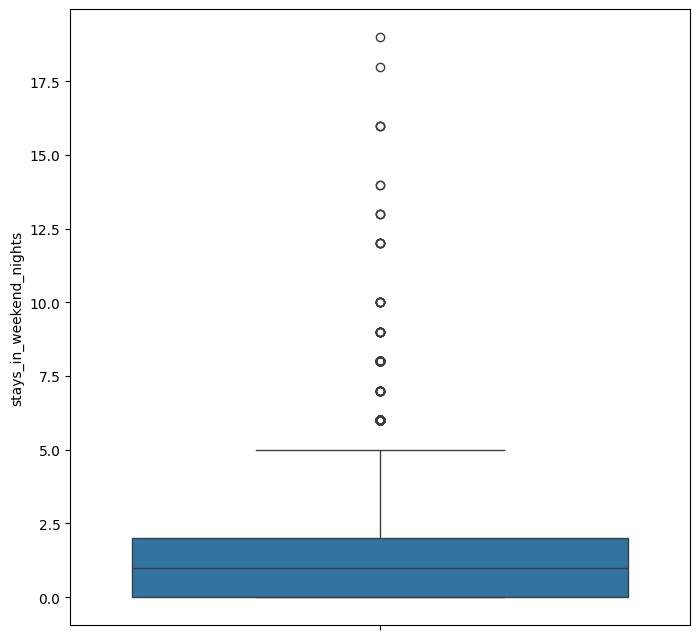

In [66]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["stays_in_weekend_nights"])
plt.show()

Observamos que la mayor√≠a de huespedes se quedan hasta cinco noches de fin de semana.
‚û°Ô∏è Tambi√©n se pueden analizar los datos utilizando alguna variable categ√≥rica, por ejemplo, las reservas canceladas o no canceladas y vincularlo a una variable num√©rica como las noches de fin de semana:

<Axes: xlabel='is_canceled', ylabel='stays_in_weekend_nights'>

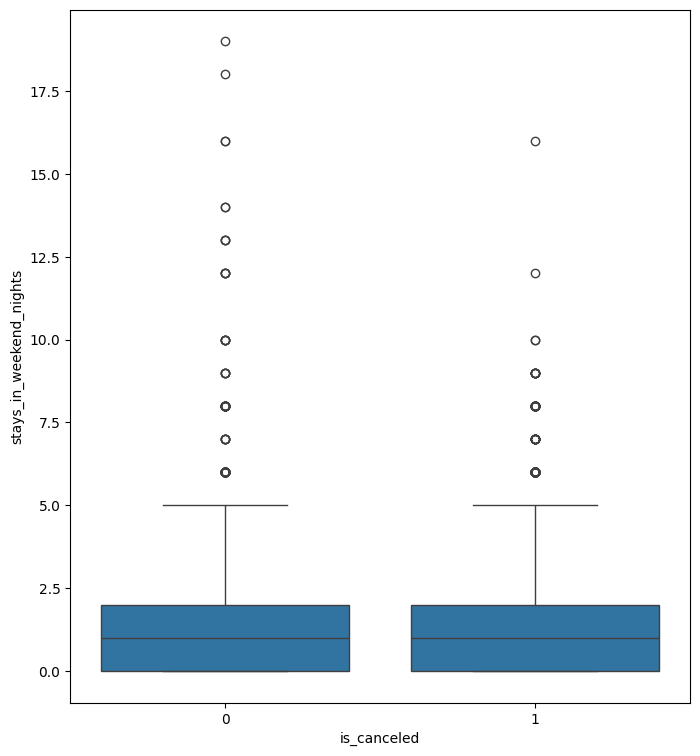

In [67]:
fig = plt.figure(figsize=(8,9))
sns.boxplot(x="is_canceled", y="stays_in_weekend_nights", data=df)

**Paso 7. Calcular las estad√≠sticas:**
dataframe.describe para visualizar las estad√≠sticas del conjunto de datos. Por defecto, la funci√≥n describe trabaja con columnas num√©ricas y no con columnas de tipo object, mostrando los siguientes datos:

El n√∫mero de elementos de la variable
La media
La desviaci√≥n est√°ndar (std)
El valor m√≠nimo
Los cuartiles
El valor m√°ximo

In [68]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

‚û°Ô∏è Ahora visualizamos a las variables categ√≥ricas: agreg√°ndole include=['object'] podremos observar solo las columnas que son categ√≥ricas (de tipo object):

In [69]:
df.describe(include=['object'])

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104641         89613              75166                    1461

unique: para saber cuantos valores son √∫nicos, como podemos ver en la columna hotel hay 2 valores diferentes.
top: para ver el valor que m√°s se repite, el cual es City Hotel.
freq: la frecuencia en que se repide el valor City Hotel.

**Paso 8. An√°lisis de tendencia central, posici√≥n y dispersi√≥n:** üéØ
El an√°lisis de la tendencia central, la simetr√≠a y la dispersi√≥n de los datos es importante para entender c√≥mo se comporta cada variable:

‚û°Ô∏è lead_time: n√∫mero de d√≠as entre hecha la reserva y el d√≠a de llegada al hotel.

<function matplotlib.pyplot.show(close=None, block=None)>

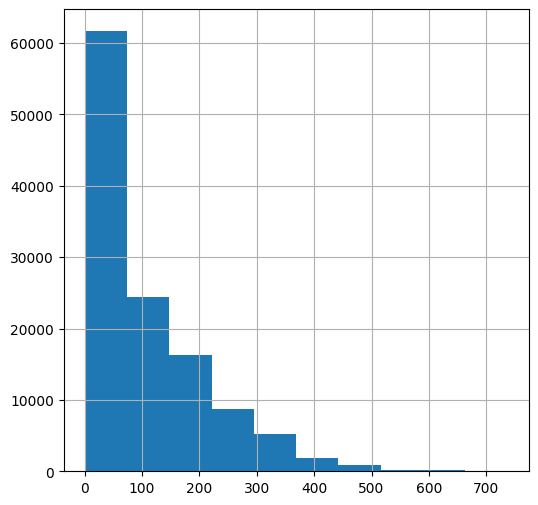

In [70]:
df['lead_time'].hist(figsize = (6,6))
plt.show

Este gr√°fico muestra un sesgo positivo hacia la derecha

In [71]:
mean = df['lead_time'].mean()
median = df['lead_time'].median()
mode = df['lead_time'].mode()
skew = df['lead_time'].skew()
kurt = df['lead_time'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 104.01141636652986
La mediana es: 69.0
La moda es: 0    0
Name: lead_time, dtype: int64
El sesgo es: 1.3465498727254268
La kurtosis es: 1.6964488485585467


‚û°Ô∏è arrival_date_week_number: n√∫mero de la semana del a√±o en que llega el huesped al hotel.

<function matplotlib.pyplot.show(close=None, block=None)>

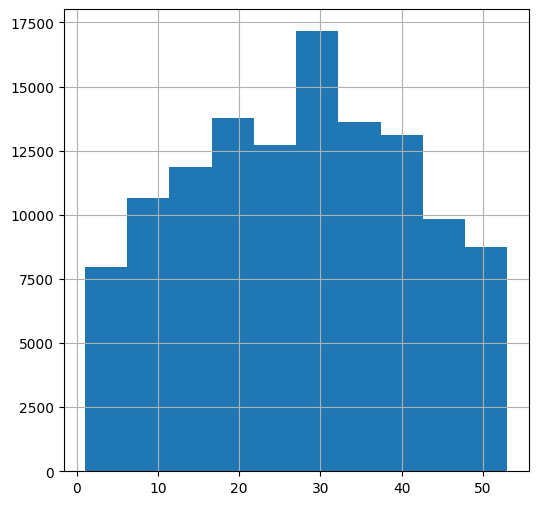

In [72]:
df['arrival_date_week_number'].hist(figsize = (6,6))
plt.show

In [73]:
mean = df['arrival_date_week_number'].mean()
median = df['arrival_date_week_number'].median()
mode = df['arrival_date_week_number'].mode()
skew = df['arrival_date_week_number'].skew()
kurt = df['arrival_date_week_number'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 27.16517296255968
La mediana es: 28.0
La moda es: 0    33
Name: arrival_date_week_number, dtype: int64
El sesgo es: -0.010014326041540811
La kurtosis es: -0.9860771763295451


**Paso 9. Contando datos duplicados:**
Para ver los datos duplicados del conjunto de datos llamamos al m√©todo duplicated() en el DataFrame. Si luego llamamos al m√©todo SUM, obtendremos el total de duplicados:

In [74]:
df.duplicated().sum()

np.int64(31994)

Observamos que existen 31994 filas con los mismos datos

**Paso 10. Exploraci√≥n y visualizaci√≥n de los datos:**
Utilizando tecnicas de visualizaci√≥n se puede comenzar a comprender el contexto alrededor de los datos, se van a realizar diferentes preguntas capaces de brindar informaci√≥n interesante.

Estas preguntas nos ayudan a encontrar an√°lisis significativos sin siquiera aplicar alguna t√©cnica de anal√≠tica.
Se comprende mejor el mundo de las reservas de hoteles, as√≠ como las necesidades que les pueden surgir a las empresas y que se tratan de solucionar con herramientas anal√≠ticas.
Empezaremos a analizar las variables num√©ricas y luego las categ√≥ricas.

**10.1. An√°lisis de variables num√©ricas:**
Explorando las variables num√©ricas observamos su distribuci√≥n. Se puede utilizar el diagrama de hist para visualizar todos los histogramas de las variables num√©ricas dentro del dataframe:

array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_week_number'}>],
       [<Axes: title={'center': 'arrival_date_day_of_month'}>,
        <Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>],
       [<Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>,
        <Axes: title={'center': 'company'}>],
       [<Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_ca

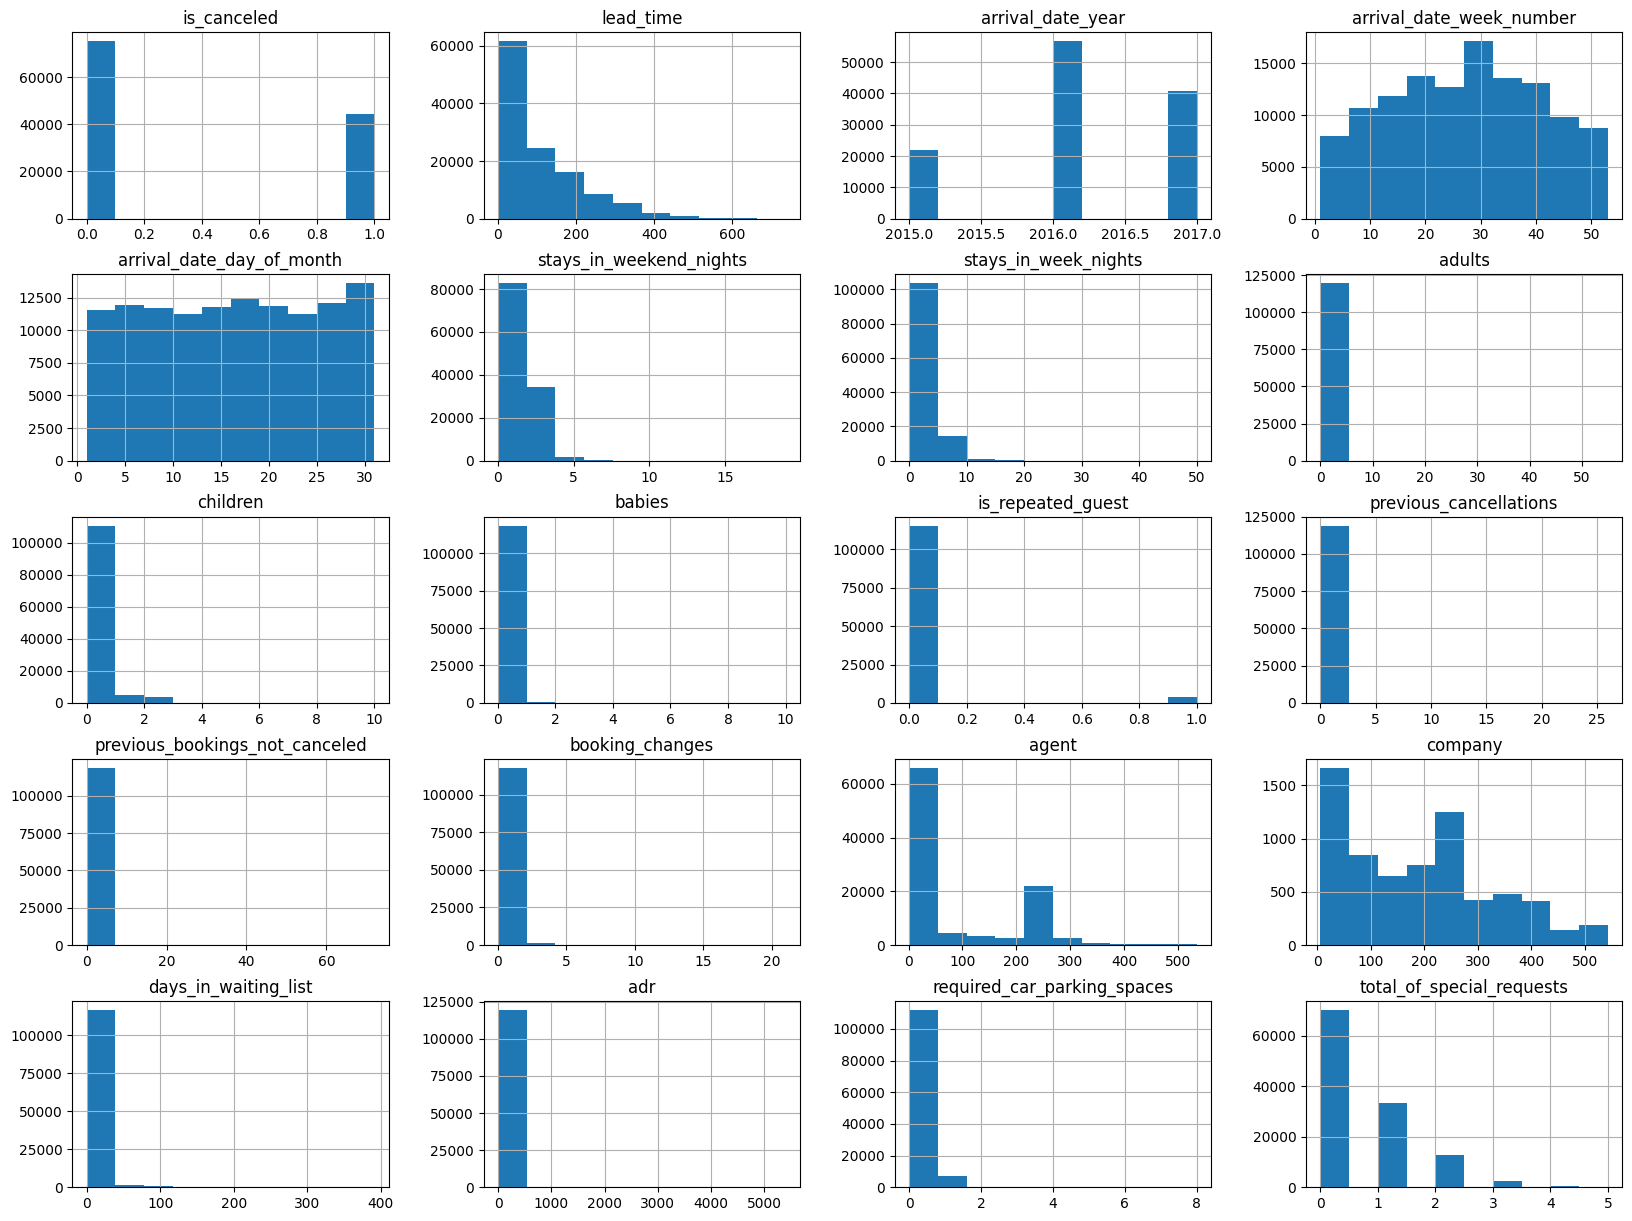

In [75]:
df.hist(figsize=(20,15))

‚û°Ô∏è Tambi√©n se puede analizar cada variable de manera independiente. En este gr√°fico se muestra el histograma de la variable arrival_Date_week_number que muestra las diferentes semanas del a√±o 1-52, donde los clientes reservan o se hospedan en los hoteles:



<function matplotlib.pyplot.show(close=None, block=None)>

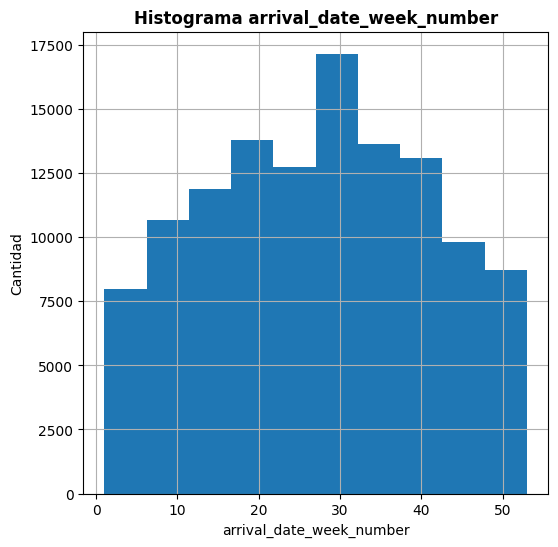

In [76]:
df['arrival_date_week_number'].hist(figsize = (6,6))
plt.xlabel('arrival_date_week_number')
plt.ylabel('Cantidad')
plt.title('Histograma arrival_date_week_number', fontweight = "bold")
plt.show

‚û°Ô∏è En este histograma se aprecia la distribuci√≥n de la variable adr (tarifa diaria promedio):

<function matplotlib.pyplot.show(close=None, block=None)>

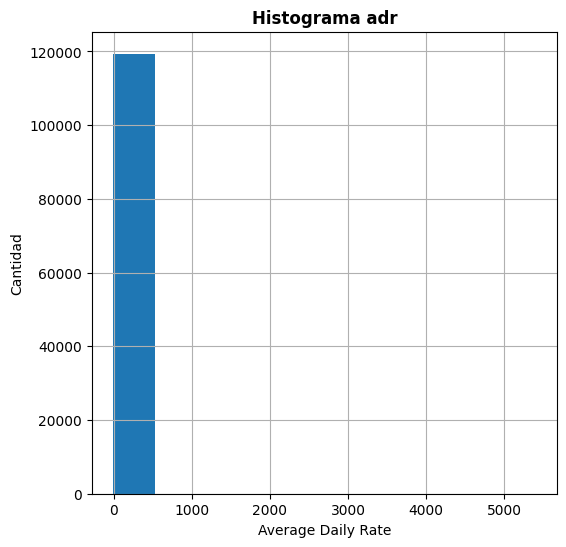

In [77]:
df['adr'].hist(figsize = (6,6))
plt.xlabel('Average Daily Rate')
plt.ylabel('Cantidad')
plt.title('Histograma adr', fontweight = "bold")
plt.show

‚û°Ô∏è Para visualizar la relaci√≥n entre dos variables num√©ricas se utiliza un gr√°fico de l√≠neas. Este combina las variables de mes de llegada arrival_date_month y tarifa promedio adr. Como tenemos variables que representan tiempo (a√±os, meses, semanas, fecha) se puede realizar un an√°lisis en el tiempo para ver su comportamiento. La temporada alta es junio, julio, agosto y la temporada baja es noviembre, diciembre y enero:

<Axes: xlabel='arrival_date_month', ylabel='adr'>

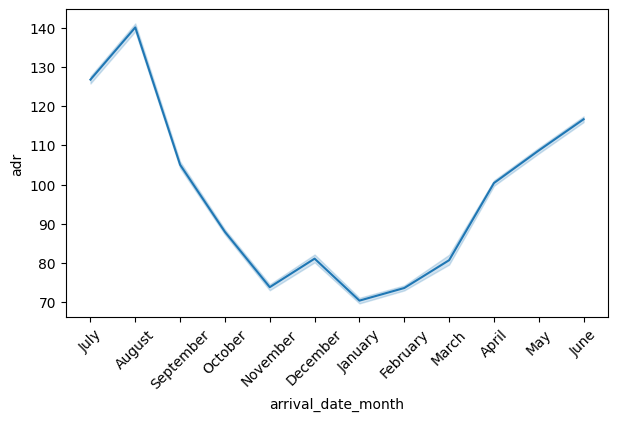

In [78]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation = 45, fontsize=10)
sns.lineplot(data=df, x = 'arrival_date_month', y = 'adr')

‚û°Ô∏è Ahora hacemos lo mismo, pero con el n√∫mero de semana del a√±o arrival_date_week_number:

Vemos que el gr√°fico coincide, ya que el n√∫mero de semana coincide con el mes del a√±o.

<Axes: xlabel='arrival_date_week_number', ylabel='adr'>

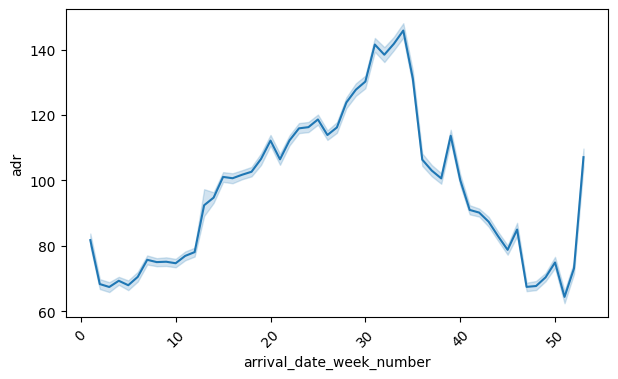

In [79]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation = 45, fontsize=10)
sns.lineplot(data=df, x = 'arrival_date_week_number', y = 'adr')

**10.2. An√°lisis de variables categ√≥ricas:**
Para analizar las variables categ√≥ricas, seleccionamos primero el subconjunto del dataframe y visualizamos los valores de cada categor√≠a. Identificamos alg√∫n valor que no corresponda con el negocio.

Seleccionar las variables categ√≥ricas:

In [80]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date  
0     Transient          Check-Out              2015-07-01  
1     Transient          Check-Out              2015-07-01  
2     Transient          Check-Out              2015-07-02  
3     Transient          Check-Out              2015-07-02  
4     Transient          Check-Out              2015-07-03

La columna reservation_status_date se muestra como tipo de dato categ√≥rico, sin embargo, deber√≠a de ser datetime64 m√°s adelante se har√° el cambio.
‚û°Ô∏è Visualizar los valores de cada una de las variables:

Esto nos ayuda a identificar valores que no coinciden con el dominio del negocio, de ser as√≠, lo eliminar√≠amos.

In [81]:
for col in df_cat.columns:
  print(f"{col}: \n{df_cat[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

‚û°Ô∏è Ahora, utilizando gr√°ficos se observa la proporci√≥n entre las distintas categor√≠as.

Gr√°fico que muestra a la variable si la reserva fue cancelada o no:


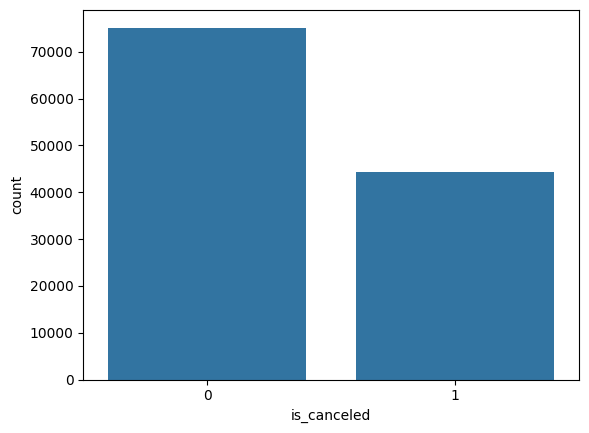

In [82]:
sns.countplot(data=df, x = 'is_canceled')
plt.show()

‚û°Ô∏è Inclinaci√≥n de los clientes por los distintos tipos de habitaci√≥n:



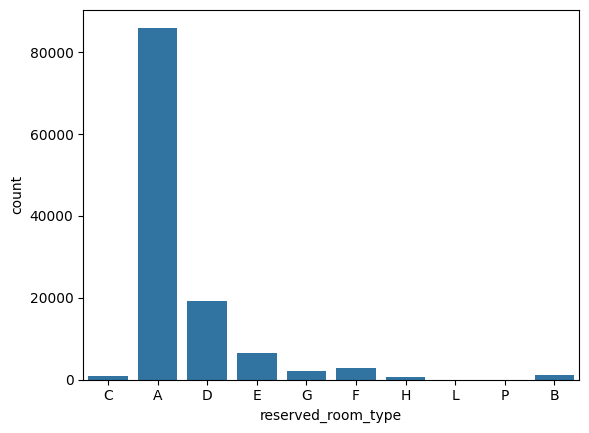

In [83]:
sns.countplot(data=df, x = 'reserved_room_type')
plt.show()

Observamos que el tipo de habitaci√≥n A es la que m√°s se ha reservado.
‚û°Ô∏è Por d√≥nde se realizaron las reservas:

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online TA'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Complementary'),
  Text(5, 0, 'Groups'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

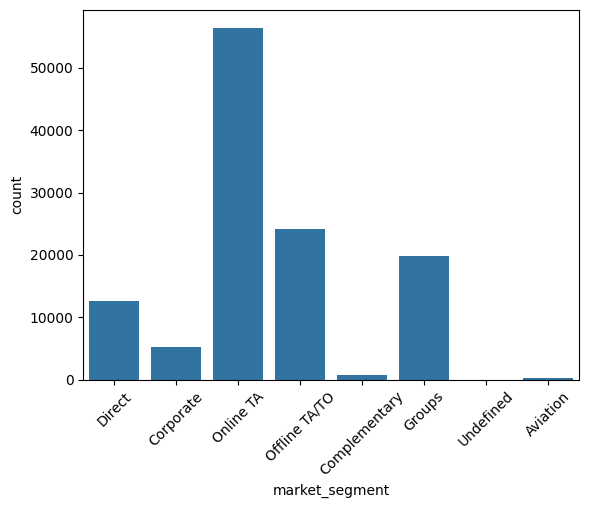

In [84]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45, fontsize=10)

Observamos que la mayor√≠a de reservas se hicieron por Online TA.
‚û°Ô∏è An√°lisis de las reservas que no fueron canceladas, seg√∫n el segmento del mercado:

([<matplotlib.patches.Wedge at 0x788a1c32ea50>,
 [Text(-0.08535846940548389, 1.0966831500942982, 'Online TA'),
  Text(-0.7616375140674992, -0.793667623860946, 'Offline TA/TO'),
  Text(0.24877953754728754, -1.0714983629001764, 'Direct'),
  Text(0.8380610587422584, -0.7124981837308815, 'Groups'),
  Text(1.0659460511383603, -0.27158611168934343, 'Corporate'),
  Text(1.098173903778087, -0.06335674439865994, 'Complementary'),
  Text(1.0999130626275913, -0.013829485210679286, 'Aviation')],
 [Text(-0.04655916513026393, 0.5981908091423445, '52.473%'),
  Text(-0.41543864403681774, -0.4329096130150614, '20.710%'),
  Text(0.13569792957124774, -0.5844536524910052, '10.896%'),
  Text(0.45712421385941365, -0.3886353729441171, '9.414%'),
  Text(0.581425118802742, -0.14813787910327822, '5.073%'),
  Text(0.5990039475153202, -0.034558224217450875, '1.034%'),
  Text(0.5999525796150498, -0.0075433555694614275, '0.400%')])

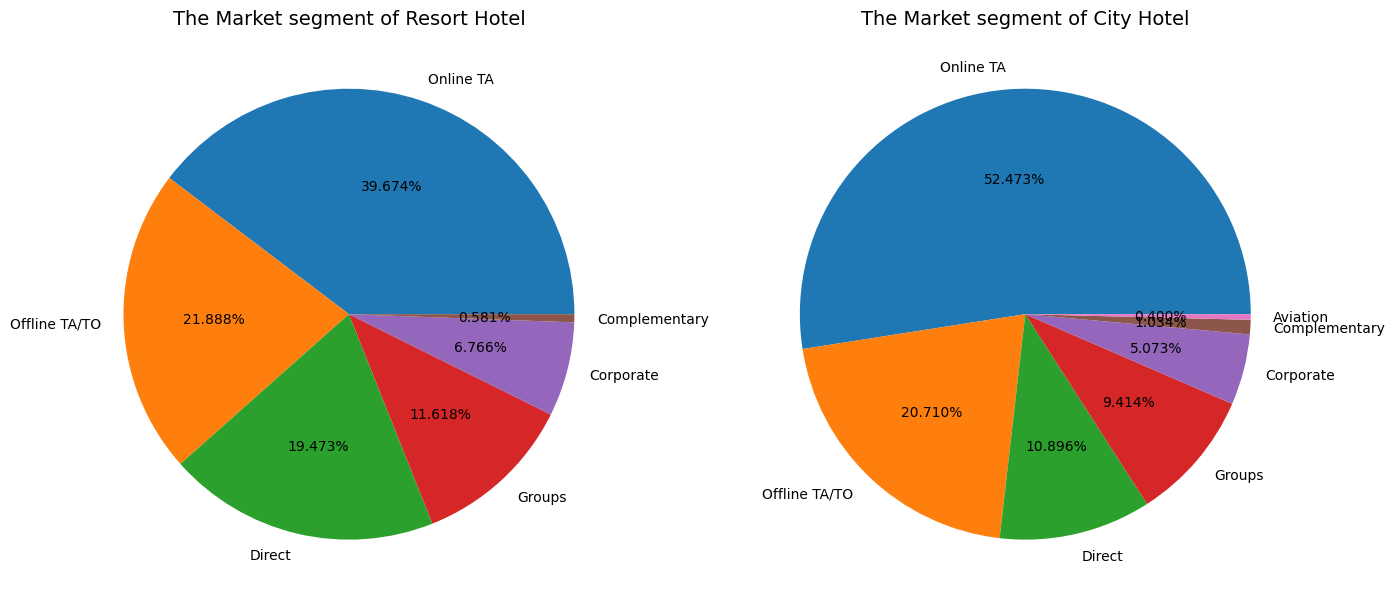

In [85]:
#Separamos los grupos por tipo de hotel y solo con reservas no canceladas:
rh = pd.DataFrame(df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)])
ch = pd.DataFrame(df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)])

#Ajustamos tama√±o de la figura:
fig = plt.figure(figsize = (16, 9))

#Pie de Resort Hotel:
ax = fig.add_subplot(121)
rh_segment_pie = pd.DataFrame(rh['market_segment'].value_counts())
ax.set_title('The Market segment of Resort Hotel', fontsize = 14)
# rh_segment_pie['market_segment'] does not exist, it is actually in the index
# Use rh_segment_pie['count'] instead to access the values for the pie chart
# and rh_segment_pie.index to access the labels
ax.pie(x = rh_segment_pie['count'], labels = rh_segment_pie.index, autopct = '%.3f%%')

#Pie de City Hotel:
ax = fig.add_subplot(122)
ch_segment_pie = pd.DataFrame(ch['market_segment'].value_counts())
ax.set_title('The Market segment of City Hotel', fontsize = 14)
# Similarly, use ch_segment_pie['count'] for the values and ch_segment_pie.index for the labels
ax.pie(x = ch_segment_pie['count'], labels = ch_segment_pie.index, autopct = '%.3f%%')

**Paso 11. Combinando variables:**
Despu√©s de analizar las variables de manera individual para comprender su comportamiento, se pueden encontrar relaciones interesantes entres dos, tres o cuatro variables. A continuaci√≥n se responden algunas preguntas interesantes:

‚û°Ô∏è ¬øQu√© tipo de hotel tiene el mayor n√∫mero de cancelaciones?

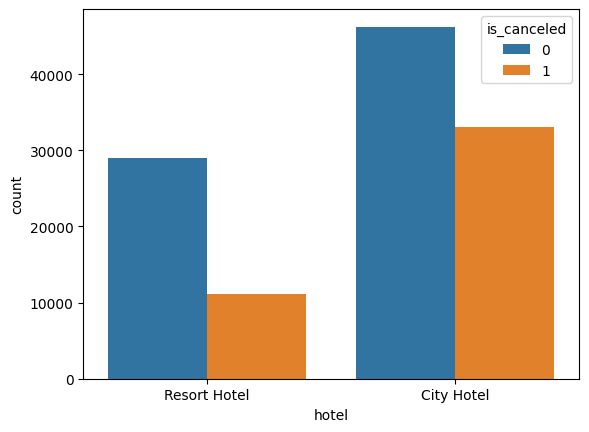

In [86]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')
plt.show()

‚û°Ô∏è ¬øCu√°les son los paises m√°s visitados?

In [87]:
paises_mas_visitas = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
paises_mas_visitas.columns = ['country', 'No of guests']
paises_mas_visitas

country  No of guests
0       PRT         21071
1       GBR          9676
2       FRA          8481
3       ESP          6391
4       DEU          6069
..      ...           ...
160     KIR             1
161     ATF             1
162     TJK             1
163     SLE             1
164     FRO             1

[165 rows x 2 columns]

‚û°Ô∏è Mapa para visualizar los paises anteriores y la cantidad de visitantes:

In [88]:
basemap = folium.Map()
guests_map = px.choropleth(
    paises_mas_visitas,
    locations = paises_mas_visitas['country'],
    color_continuous_scale="portland",
    color = paises_mas_visitas['No of guests'],
    hover_name = paises_mas_visitas['country']
)

guests_map.show()

‚û°Ô∏è ¬øCu√°nto se paga por una noche de alojamiento?

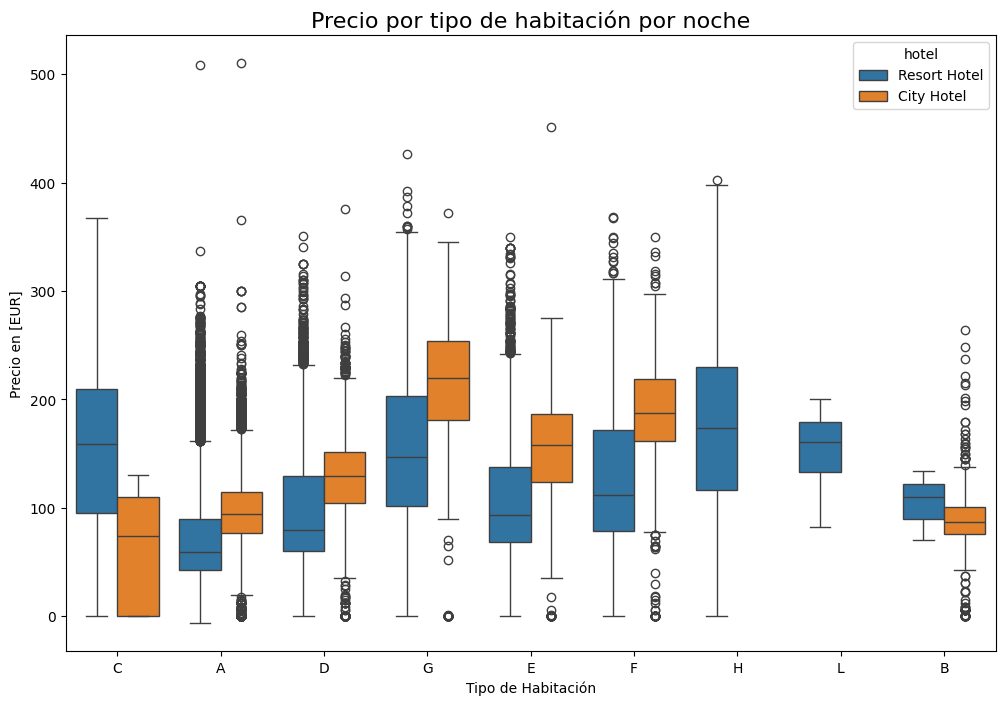

In [89]:
# Filtramos las reservas no canceladas
cuanto_se_paga = df[df['is_canceled'] == 0]
plt. figure (figsize= (12,8))

sns.boxplot(x='reserved_room_type', y='adr', data=cuanto_se_paga, hue='hotel')
plt.title('Precio por tipo de habitaci√≥n por noche', fontsize=16)
plt.xlabel('Tipo de Habitaci√≥n')
plt.ylabel('Precio en [EUR]')
plt.show()

‚û°Ô∏è ¬øExiste alguna relaci√≥n entre el n√∫mero de d√≠as transcurridos desde la reserva y las cancelaciones?

lead_time: num d√≠as transcurridos entre la fecha de reserva y el dia de llegada al hotel.

Text(0.5, 1.0, 'Alo de llegada, Anticipo y Cancelaciones')

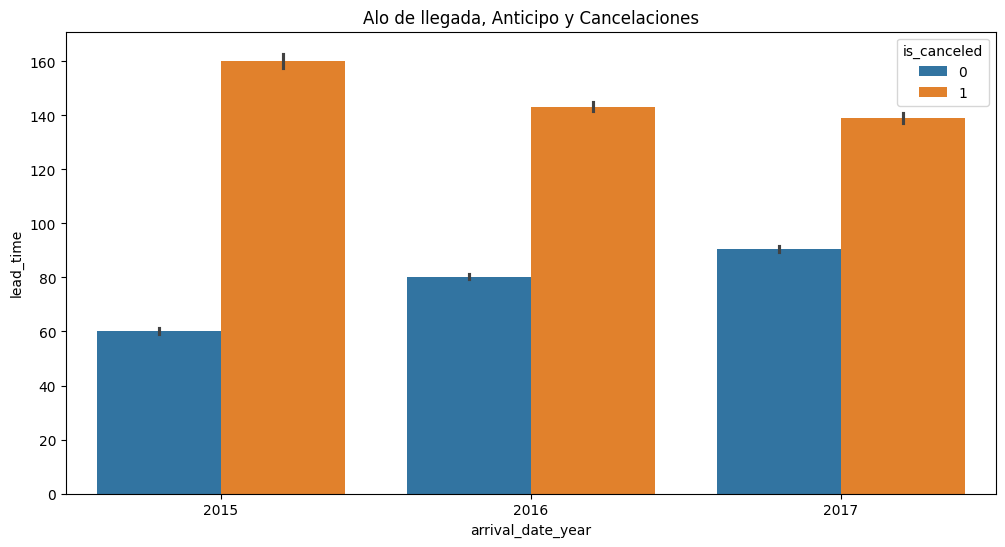

In [90]:
plt.figure(figsize= (12, 6))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data = df)
plt.title ('Alo de llegada, Anticipo y Cancelaciones')

‚û°Ô∏è ¬øSe distribuyen de forma homog√©nea las llegadas dependiendo del mes?

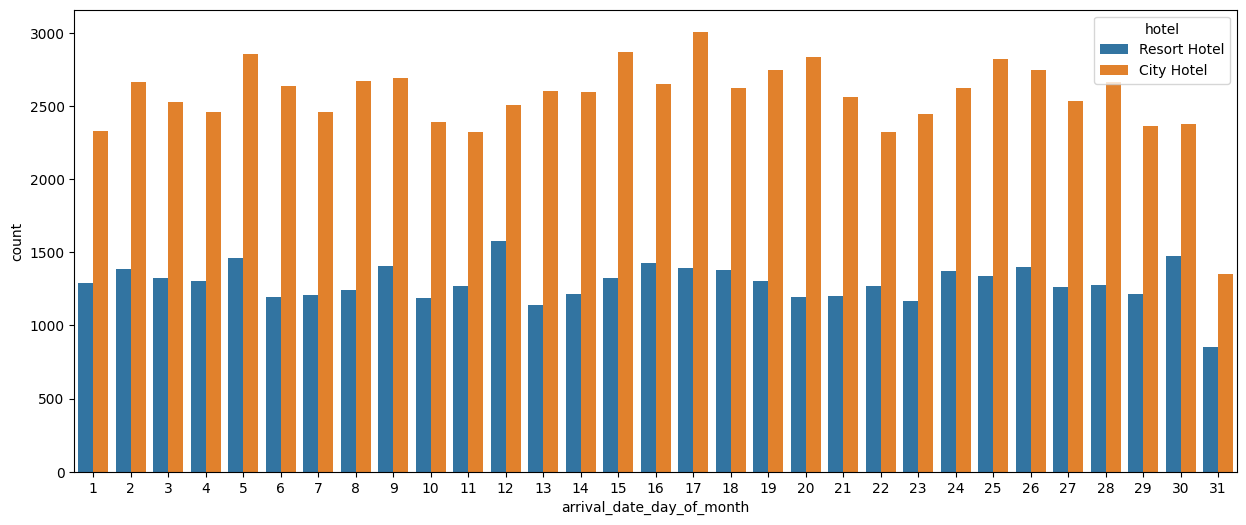

In [91]:
plt.figure(figsize = (15,6))
sns.countplot(data = df, x = 'arrival_date_day_of_month', hue = 'hotel')
plt.show()

Se concluye que se distribuyen de forma razonablemente homogenea. El valor m√°s bajo se registra los d√≠as 31, esto se debe a que no todos los meses tienen 31 d√≠as y por tanto el recuento de llegadas es inferior.
‚û°Ô∏è ¬øQu√© tipo de r√©gimen de pensi√≥n eligen los hu√©spedes?

SC: No meal
BB: Bed and Breakfast
HB: Half board
FB: Full board (pensi√≥n completa)
Undefined: No definido el r√©gimen de comida

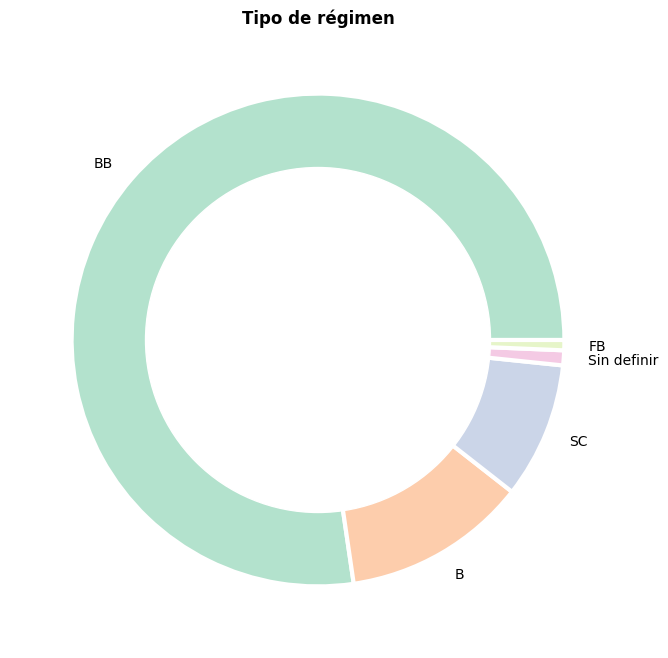

In [92]:
meal_labels = ['BB','B', 'SC', 'Sin definir', 'FB']
size = df['meal'].value_counts()

plt.figure(figsize=(8,8))
cmap = plt.get_cmap("Pastel2")
colors = cmap(np.arange(6)*1)
my_circle = plt.Circle((0,0), 0.7, color = 'white')

plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Tipo de r√©gimen', weight='bold')
plt.show()

La mayor√≠a de las reservas son con r√©gimen de cama de desayuno (Bed & Breakfast) y s√≥lo una parte muy peque√±a elije pensi√≥n completa (Full Board)
‚û°Ô∏è Se puede analizar el comportamiento de un pa√≠s en espec√≠fico, utilicemos Espa√±a como ejemplo:

Cantidad de reservas en Espa√±a

In [93]:
reservation_date_Spain = df[df['country'] == "ESP"][df['is_canceled'] == 0]['arrival_date_year'].value_counts().reset_index()
reservation_date_Spain.columns = ['A√±o', 'N¬∞ Reservas']
reservation_date_Spain

<ipython-input-93-ed051c4fcc5e>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



A√±o  N¬∞ Reservas
0  2016         2850
1  2015         1800
2  2017         1741

Se visualizan los resultados de Espa√±a:

<Axes: xlabel='A√±o', ylabel='N¬∞ Reservas'>

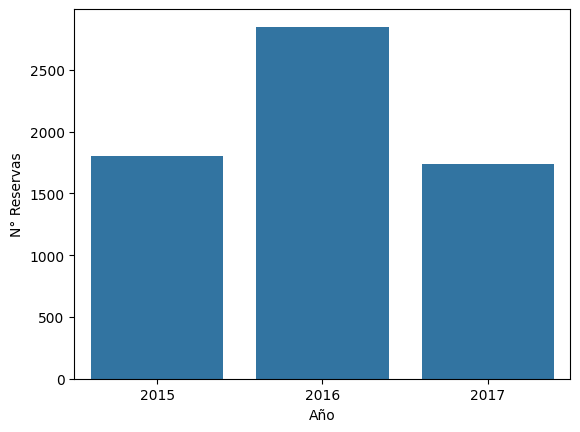

In [94]:
sns.barplot(x = "A√±o", y = "N¬∞ Reservas", data = reservation_date_Spain)

‚û°Ô∏è Ahora analizamos el comportamiento de la cantidad de reservas en Per√∫:

In [95]:
reservation_date_Peru = df[df['country'] == "PER"][df['is_canceled'] == 0] ['arrival_date_year'].value_counts().reset_index()
reservation_date_Peru.columns = ['A√±o', 'N¬∞ Reservas']
reservation_date_Peru

<ipython-input-95-3d2fa2c6ec98>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



A√±o  N¬∞ Reservas
0  2017           11
1  2016           10
2  2015            2

‚û°Ô∏è Se visualizan los resultados de Per√∫:

<Axes: xlabel='A√±o', ylabel='N¬∞ Reservas'>

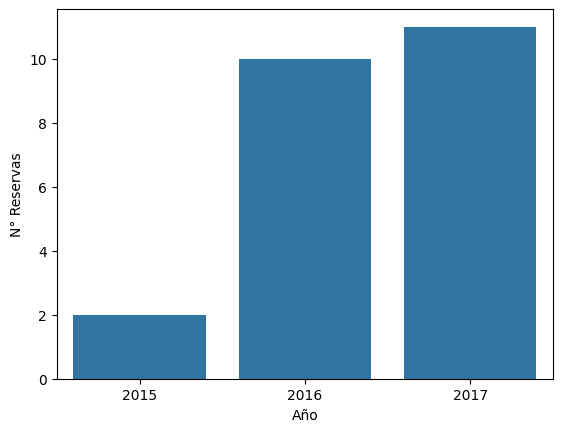

In [96]:
sns.barplot(x = "A√±o", y = "N¬∞ Reservas", data = reservation_date_Peru)

‚û°Ô∏è ¬øCu√°l es el pa√≠s con m√°s hoteles y de qu√© tipo?

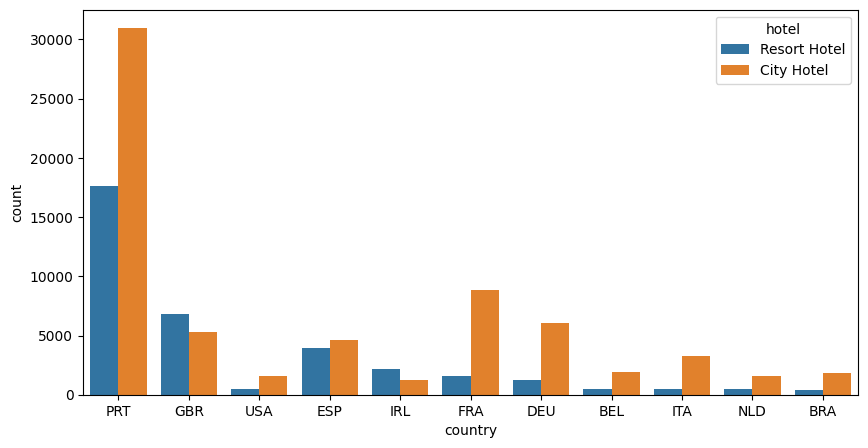

In [97]:
counts = df['country'].value_counts()
plt.subplots(figsize = (10, 5))
sns.countplot(x= 'country', hue='hotel', data=df[df['country'].isin(counts[counts > 2000].index)])
plt.show()

In [98]:
counts = df['country'].value_counts()
counts

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

‚û°Ô∏è Analizamos la relaci√≥n entre las variables ‚ÄúDeposit type‚Äù y ‚Äúis_canceled‚Äù:



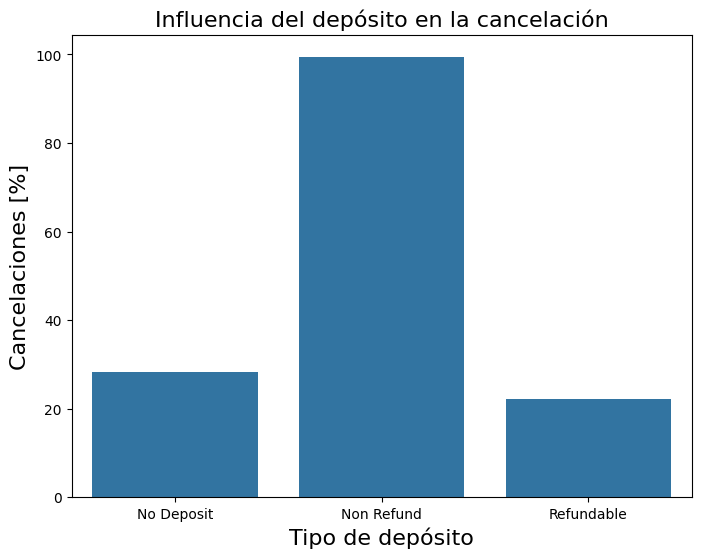

In [99]:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()

plt.figure(figsize=(8, 6))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data ["mean"] * 100)
plt.title("Influencia del dep√≥sito en la cancelaci√≥n", fontsize=16)
plt.xlabel("Tipo de dep√≥sito", fontsize=16)
plt.ylabel("Cancelaciones [%]", fontsize=16)
plt.show()

‚û°Ô∏è De este an√°lisis exploratorio de los datos se puede concluir lo siguiente:

La indudable importancia de la variable hotel, referida al tipo de hotel que se est√° reservando, pues como hemos podido ver en varios gr√°ficos, la diferencia en la interpretaci√≥n es considerable cuando hablamos de un resort frente a un hotel de ciudad.
Por otro lado, las peculiaridades en ciertas variables como ‚Äúlead_time‚Äù, ‚ÄúBooking_changes‚Äù y ‚Äúprevious_cancellations‚Äù, las cuales se considera que pueden tener un peso considerable para predecir de una manera m√°s precisa futuras cancelaciones.

**Paso 12. Limpieza de datos:**
Resolveremos problemas de calidad
‚û°Ô∏è Resolver problema de datos faltantes, observemos qu√© variables tienen datos faltantes y qu√© se puede hacer en cada caso:

In [100]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [101]:
df[["children", "country", "agent", "company"]].describe(include="all")

children country          agent      company
count   119386.000000  118902  103050.000000  6797.000000
unique            NaN     177            NaN          NaN
top               NaN     PRT            NaN          NaN
freq              NaN   48590            NaN          NaN
mean         0.103890     NaN      86.693382   189.266735
std          0.398561     NaN     110.774548   131.655015
min          0.000000     NaN       1.000000     6.000000
25%          0.000000     NaN       9.000000    62.000000
50%          0.000000     NaN      14.000000   179.000000
75%          0.000000     NaN     229.000000   270.000000
max         10.000000     NaN     535.000000   543.000000

‚û°Ô∏è La cantidad de datos faltantes en la columna company hace que no sea √∫til sustituirlos o imputarlos, pues faltan muchos datos y modificarlos supondr√≠a una grave alteraci√≥n de los datos.

‚û°Ô∏è La columna agent no est√° en la misma situaci√≥n pero no aporta gran valor pues solo es el identificador de los agentes, no el nombre en si. Por tanto se procede a eliminar esas variables:

In [102]:
df = df.drop(['company', 'agent'], axis=1)

‚û°Ô∏è Para trabajar las columnas country y children una alternativa es eliminar los registros que tienen NA:

A modo de ejemplo lo eliminamos, pero lo almacenamos en otro DataFrame (df1):

In [103]:
df1 = df.dropna (subset=['country', 'children'], axis = 0)

In [104]:
print(df1.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

‚û°Ô∏è Otra alternativa es sustituir la variable con un valor.

Para la columna country que es categ√≥rica ser√≠a sustituir con la Moda.
El pa√≠s m√°s com√∫n es PRT (Portugal). Por ello, sustitu√≠mos por PRT a los datos faltantes:

In [105]:
df["country"].replace(np.nan, "PRT", inplace=True)

<ipython-input-105-5eba20add1f0>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Para la variable children que es num√©rica ser√≠a necesario analizar su simetr√≠a y luego sustituir con su media o mediana:

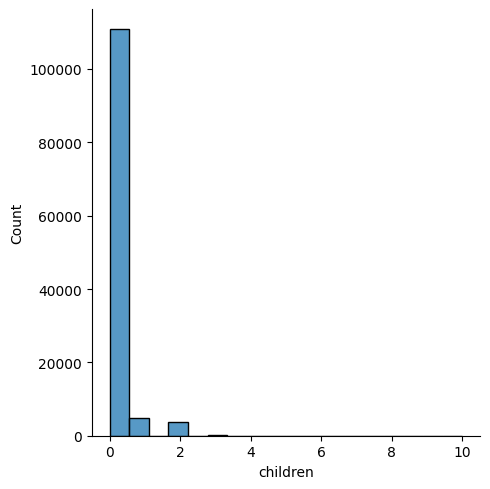

In [106]:
sns.displot(df["children"])

In [107]:
mean = df['children'].mean()
median = df['children'].median()
mode = df['children'].mode()
skew = df['children'].skew()
kurt = df['children'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 0.10388990333874994
La mediana es: 0.0
La moda es: 0    0.0
Name: children, dtype: float64
El sesgo es: 4.11258954232252
La kurtosis es: 18.673692362954903


‚û°Ô∏è A los datos faltantes lo sustitu√≠mos por 0, porque su mediana es 0:

In [108]:
df["children"].replace(np.nan, 0, inplace=True)

<ipython-input-108-c7bb08c9b391>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [109]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Paso 13. Tipos de datos:**
La columna children tiene como tipo de dato float, pero deber√≠a ser int, entonces procedemos a cambiarle su tipo de dato, lo mismo hacemos para la columna reservation_status_date lo cambiamos de tipo object a DateTime:

In [110]:
df[["children"]] = df[["children"]].astype("int")
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [111]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
days_in_waiting_list                       int64
customer_type                             object
adr                                      float64
required_car_parking_spaces                int64
total_of_special_requests                  int64
reservation_status                        object
reservation_status_date           datetime64[ns]
dtype: object

**Paso 14. Datos inconsistentes:**
Al analizar las caracteristicas de las reservas, en concreto en lo que se refiere a los hu√©spedes, se puede observar que existen registros que cumplen con la condici√≥n de que: (data.children == 0) & (data.adults == 0) & (data.babies == 0)
No puede haber O‚Äôs en una misma observaci√≥n en adults, children y babies (no se puede hacer una reserva sin hu√©spedes).
Estos registros se deben eliminar:

In [112]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
sum(filter)

180

‚û°Ô∏è Se concluye que se trata de un error, por lo que se procede a eliminarlos:

In [113]:
df = df[~filter]
df.shape

(119210, 30)

‚û°Ô∏è Comprobaci√≥n de que no hay registros que sumen cero y por tanto el n√∫mero de registros total es correcto:

In [114]:
#Total de hu√©spedes:
df['Total_Guests'] = df['adults'] + df['children']

#Comprobamos que efectivamente no hay ning√∫n registro que sume 0:
filter = df.Total_Guests != 0
df.drop("Total_Guests", axis=1, inplace=True)
sum(filter)

<ipython-input-114-25f251eb7eb0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-25f251eb7eb0>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



119210

df.drop("Total_Guests", axis=1, inplace=True): Eliminamos la columna porque solo era para probar
El n√∫mero de registros total son 119210, asi que es correcto

**Paso 15. Datos at√≠picos:**
Se comienza con la detecci√≥n de outliers visualizando los boxplot de las diferentes variables que conforman nuestro modelo. De su visualizaci√≥n obtenemos un total de 8 variables que presentan cierta problem√°tica: ‚Äòlead time‚Äô, ‚Äòstays in weekend nights‚Äô, ‚Äòstays in week nights, ‚Äòadults‚Äô, ‚Äúbabies‚Äô, ‚Äòrequired car parking spaces‚Äô, ‚Äòadr, ‚Äòprevious cancellations‚Äô.

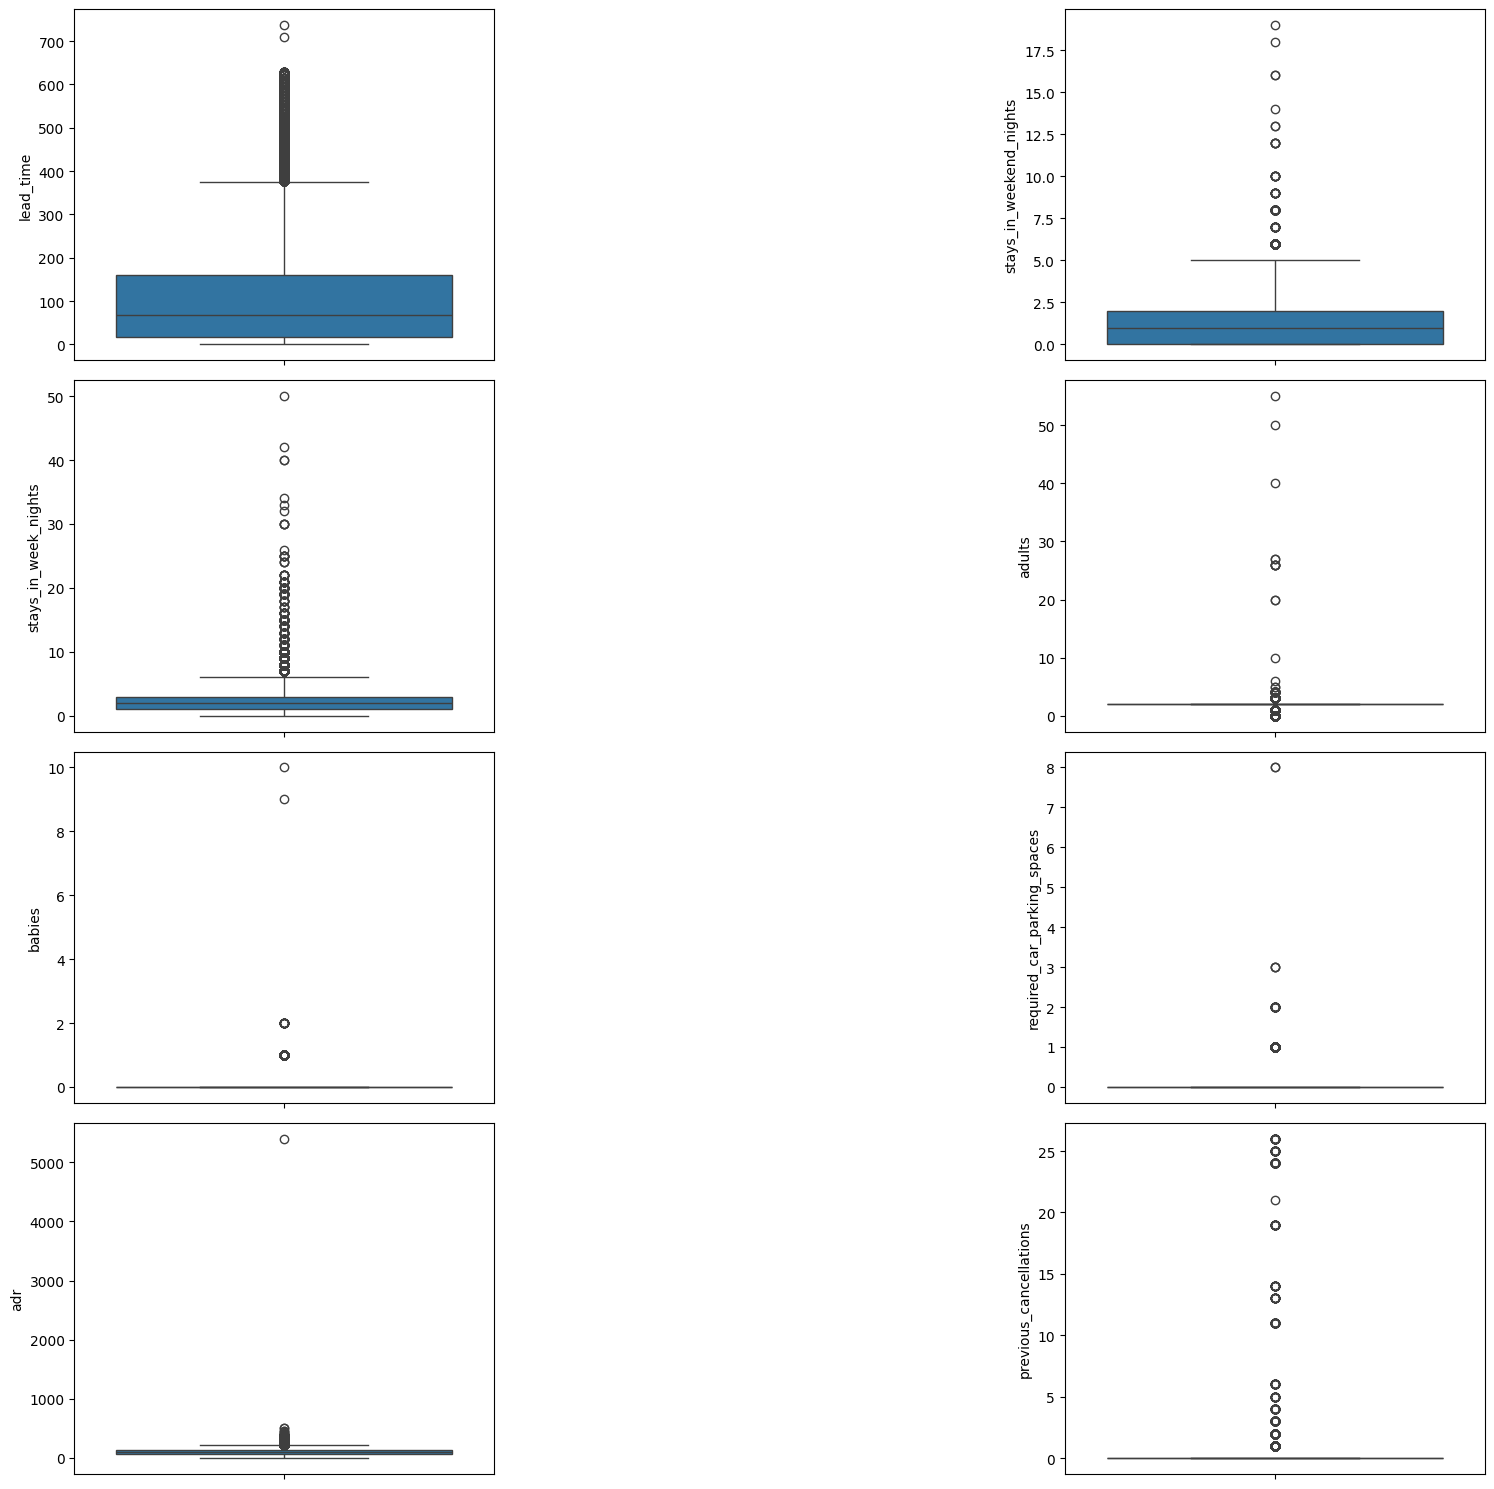

In [115]:
columnas = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
            'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations']
n = 1
plt.figure(figsize = (20, 15))

for column in columnas:
  plt.subplot(4, 4, n)
  n = n + 2
  sns.boxplot (y=df[column])
  plt.tight_layout()

‚û°Ô∏è Se procede a sustituir la mayoria de los valores at√≠picos por otros dentro del √∫ltimo cuartil o por el valor cero dependiendo del caso.

In [116]:
df.loc[df.lead_time > 400, 'lead time'] = 400
df.loc[df.stays_in_weekend_nights >= 5, 'stays_in_weekend_nights'] = 5
df.loc[df.stays_in_week_nights > 20, 'stays_in_week_nights'] = 20
df.loc[df.adults > 10, 'adults'] = 10
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000
df.loc[df.adr < 30, 'adr'] = 0

<Axes: ylabel='Frequency'>

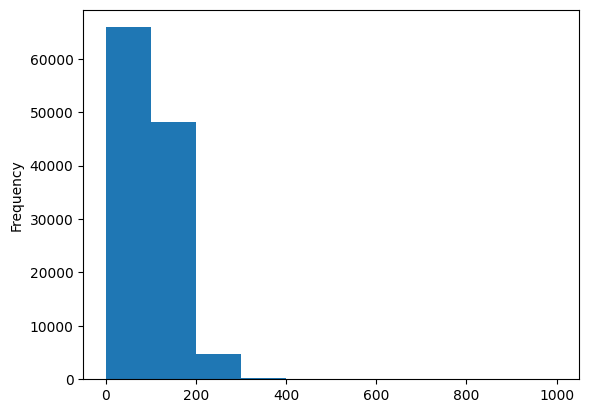

In [117]:
df['adr'].plot(kind = 'hist')

‚û°Ô∏è Cuando se quiere analizar todas las variables para saber si hay registros at√≠picos e inconsistentes entre ellas, se puede utilizar el algoritmo de LOF. Para el ejemplo se utiliza una selecci√≥n de las variables num√©ricas

In [118]:
#Seleccionar columnas:
select_df = df[['lead_time', 'arrival_date_year', 'stays_in_weekend_nights', 'adults',
                'is_repeated_guest', 'previous_cancellations', 'required_car_parking_spaces',
                'adr']]

#Especificar el modelo que se va a utilizar:
model = LocalOutlierFactor(n_neighbors = 30)

#Ajuste al modelo:
y_pred = model.fit_predict(select_df)
y_pred


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning:

Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.



array([ 1, -1,  1, ...,  1,  1,  1])

In [119]:
#Filtrar los indices de los outliers
outlier_index = (y_pred == - 1) #los valores negativos son outliers

#Filtrar los valores de los outliers en el dataframe
outlier_values = select_df.iloc[outlier_index]
outlier_values

lead_time  arrival_date_year  stays_in_weekend_nights  adults  \
1             737               2015                        0       2   
14             37               2015                        0       2   
21             72               2015                        2       2   
22             72               2015                        2       2   
30            118               2015                        4       1   
...           ...                ...                      ...     ...   
119317        188               2017                        0       3   
119321        181               2017                        0       2   
119359         63               2017                        1       2   
119366        210               2017                        2       2   
119375        200               2017                        1       2   

        is_repeated_guest  previous_cancellations  \
1                       0                       0   
14                      0                       0   
21                      0                       0   
22                      0                       0   
30                      0                       0   
...                   ...                     ...   
119317                  0                       0   
119321                  0                       0   
119359                  0                       0   
119366                  0                       0   
119375                  0                       0   

        required_car_parking_spaces     adr  
1                                 0    0.00  
14                                0   94.71  
21                                0   84.67  
22                                0   84.67  
30                                0   62.00  
...                             ...     ...  
119317                            0  129.60  
119321                            0  119.25  
119359                            0  133.50  
119366                            0   85.59  
119375                            0   85.50  

[6397 rows x 8 columns]

Se obtuvieron 6397 muestras como at√≠picos, si se aplica una t√©cnica basado en distancias, es importante eliminar los datos at√≠picos.

**Paso 16. Datos redundantes:**
Para identificar los atributos redundantes se pueden utilizar la matriz de correlaci√≥n e indentificar correlaciones entre atributos.
La matriz de correlaci√≥n solo se calcula sobre atributos num√©ricos.


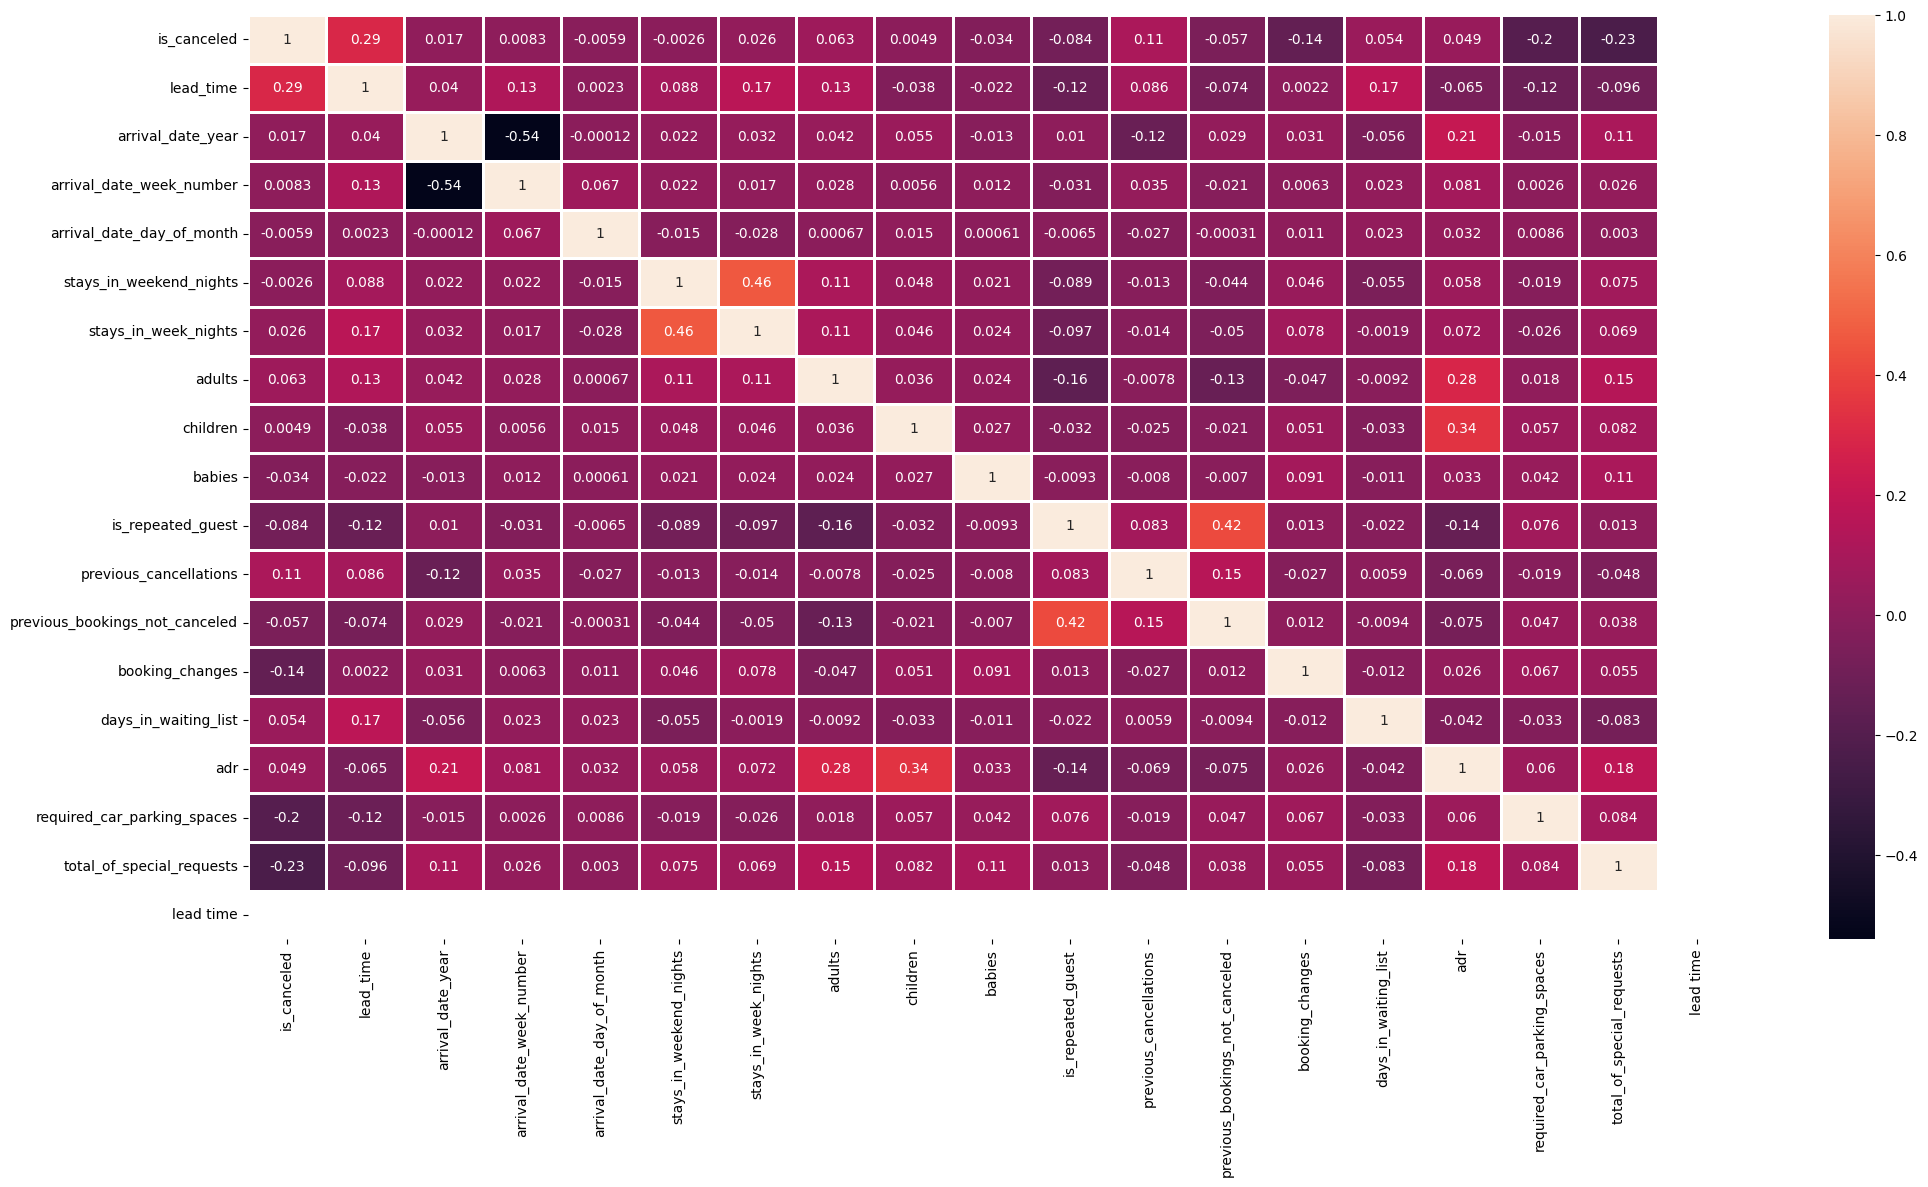

In [120]:
plt.figure(figsize = (24, 12))
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

**Paso 17. Datos duplicados:**
El an√°lis de datos duplicados en este conjunto es interesante.

Existen muchas filas duplicadas, sin embargo en algunos casos pudieran ser coincidencias de reservas iguales, para clientes diferentes.
En este caso es mejor indagar un poco en el negocio para saber cual es realmente la posibilidad de reservas identicas.
En √∫ltimo recursos, si se eliminan todos los duplicados, quedar√≠an a√∫n suficientes datos para realizar un an√°lisis interesante.

In [121]:
#Contando los duplicados de todo el dataframe:
df.duplicated().sum()

np.int64(32033)

In [122]:
#Permite ver las filas duplicadas de todo el dataframe
df.loc[df.duplicated(), :]

hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July                        27   
43                   July                        27   
138                  July                        28   
200                  July                        28   
...                   ...                       ...   
119349             August                        35   
119352             August                        35   
119353             August                        35   
119354             August                        35   
119373             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
5                               1                        0   
22                              1                        2   
43                              2                        2   
138                             5                        1   
200                             7                        0   
...                           ...                      ...   
119349                         31                        0   
119352                         31                        0   
119353                         31                        0   
119354                         31                        0   
119373                         31                        1   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
5                          2       2  ...                0    No Deposit   
22                         4       2  ...                1    No Deposit   
43                         3       2  ...                0    No Deposit   
138                        0       2  ...                0    No Deposit   
200                        1       1  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119349                     3       2  ...                0    No Deposit   
119352                     3       3  ...                0    No Deposit   
119353                     3       3  ...                0    No Deposit   
119354                     3       3  ...                0    No Deposit   
119373                     3       1  ...                0    No Deposit   

       days_in_waiting_list    customer_type     adr  \
5                         0        Transient   98.00   
22                        0        Transient   84.67   
43                        0        Transient  137.00   
138                       0        Transient   97.00   
200                       0        Transient  109.80   
...                     ...              ...     ...   
119349                    0        Transient  126.00   
119352                    0  Transient-Party  195.33   
119353                    0  Transient-Party  195.33   
119354                    0  Transient-Party  195.33   
119373                    0        Transient   82.35   

       required_car_parking_spaces  total_of_special_requests  \
5                                0                          1   
22                               0                          1   
43                     

In [123]:
#Si se quisiera eliminar los duplicados
df_drop = df.drop_duplicates()
df_drop.shape

(87177, 31)

**Paso 18. Transformaciones a los datos:**
Las transformaciones que se van a aplicar a continuaci√≥n dependen de la t√©cnica analitica a aplicar. No siempre es necesario aplicarlas todas. En este notebook se aplicar√°n todas a manera de ejemplo.
Es importante tener claras las necesidades de cada t√©cnica para aplicar lo m√°s adecuado.


**18.1. Normalizaci√≥n:**
La normalizaci√≥n o escalamiento es necesario para poner todas las variables num√©ricas en la misma escala.
Las t√©cnicas basadas en distancias siempre necesitan normalizaci√≥n. A continuaci√≥n se normalizan las variales num√©ricas:

In [124]:
df_normalize = df.copy()

In [125]:
scaler = MinMaxScaler()
df_normalize[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
              'stays_in_week_nights', 'adr']] = scaler.fit_transform(df_normalize[['lead_time',
              'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']])

df_normalize[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
              'stays_in_week_nights', 'adr']].tail(10)

lead_time  arrival_date_year  arrival_date_day_of_month  \
119380   0.059701                1.0                   1.000000   
119381   0.255088                1.0                   1.000000   
119382   0.183175                1.0                   0.966667   
119383   0.222524                1.0                   1.000000   
119384   0.028494                1.0                   0.966667   
119385   0.031208                1.0                   0.966667   
119386   0.138399                1.0                   1.000000   
119387   0.046133                1.0                   1.000000   
119388   0.147897                1.0                   1.000000   
119389   0.278155                1.0                   0.933333   

        stays_in_weekend_nights  stays_in_week_nights      adr  
119380                      0.2                  0.15  0.14075  
119381                      0.4                  0.15  0.09900  
119382                      0.4                  0.20  0.20900  
119383                      0.4                  0.20  0.08760  
119384                      0.4                  0.25  0.09614  
119385                      0.4                  0.25  0.09614  
119386                      0.4                  0.25  0.22543  
119387                      0.4                  0.25  0.15771  
119388                      0.4                  0.25  0.10440  
119389                      0.4                  0.35  0.15120

**18.2. Discretizaci√≥n:**
Para realizar un ejemplo de discretizaci√≥n se utiliza la variable lead_time que significa los d√≠as de antelaci√≥n con la que se realiza una reserva. Primero se visualiza la distribuci√≥n de la variable:

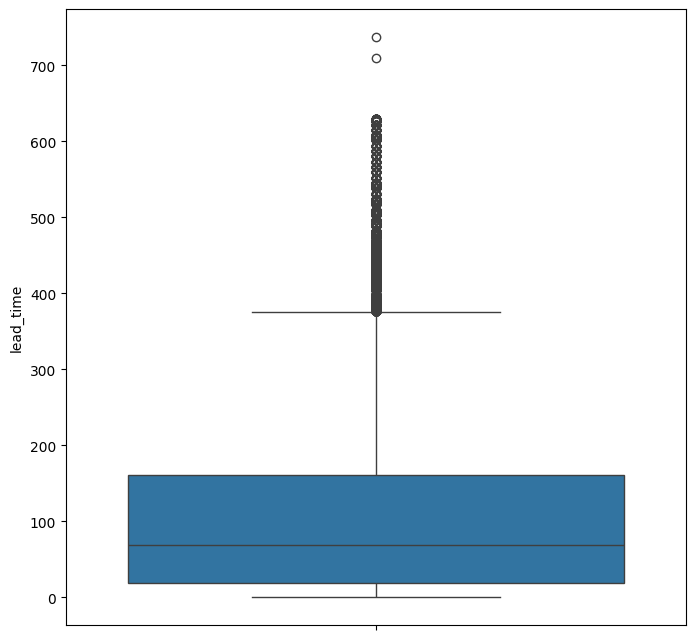

In [126]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["lead_time"])
plt.show()

‚û°Ô∏è A continuaci√≥n se dise√±an los grupos (bins) por los cuales se desea discretizar la variable y se realiza la discretizaci√≥n:

In [127]:
nivelAntelacion = ['Ninguno', '2-3Semanas', '1Mes', '2Meses', '3Meses', 'Mas3Meses']

In [128]:
df['lead_time_binned'] = pd.cut(x = df['lead_time'],
                      bins = [0, 1, 21, 30, 60, 120, 737],
                      labels = nivelAntelacion, include_lowest = True)
df[['lead_time', 'lead_time_binned']].head(10)

lead_time lead_time_binned
0        342        Mas3Meses
1        737        Mas3Meses
2          7       2-3Semanas
3         13       2-3Semanas
4         14       2-3Semanas
5         14       2-3Semanas
6          0          Ninguno
7          9       2-3Semanas
8         85           3Meses
9         75           3Meses

‚û°Ô∏è Una vez discretizada la variable se visualizan los resultados, se puede observar que la mayor proporsi√≥n de ejemplos permanecen en la categorias de Mas3Meses. Tambien se analiza c√≥mo se comportan las cancelaciones con respecto a la nueva variable:

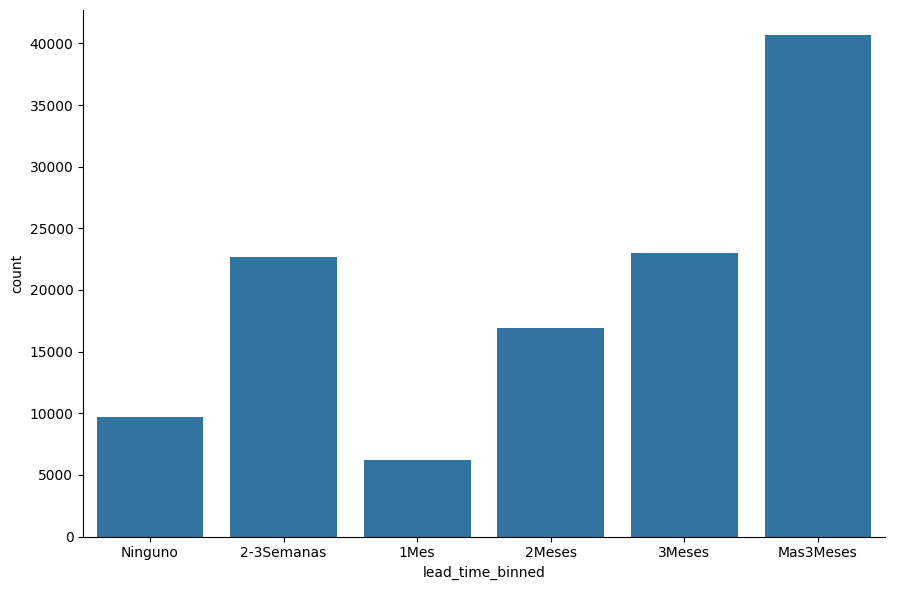

In [129]:
sns.catplot(x="lead_time_binned", kind="count", data=df, height = 6, aspect = 1.5)
plt.show()

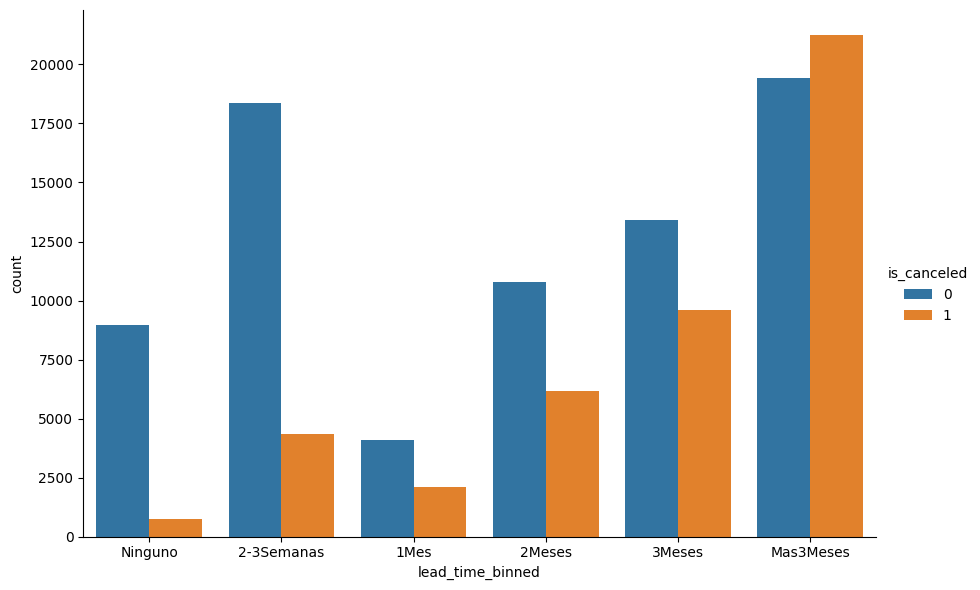

In [130]:
sns.catplot(x="lead_time_binned", hue = 'is_canceled', kind="count", data=df, height = 6, aspect = 1.5)
plt.show()

**Paso 19. Numerizaci√≥n:**
El objetivo de numerizar es convertir a n√∫mero distintas variables que son categ√≥ricas, esto puede ser muy necesario para ciertas t√©cnicas que solo funcionan con datos num√©ricos. A continuaci√≥n se muestra c√≥mo numerizar distintas variables del conjunto de datos seg√∫n su tipo y valor.
Las siguientes variables se pueden numerizar 1 a 1, esto significa que podemos sustituir los valores por n√∫meros:

In [131]:
# Numerizar 1 a 1
df_cat['hotel'] = df_cat['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'A': 0, 'B': 1,
                        'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8})
df_cat.head()

hotel arrival_date_month meal country market_segment distribution_channel  \
0      0               July   BB     PRT         Direct               Direct   
1      0               July   BB     PRT         Direct               Direct   
2      0               July   BB     GBR         Direct               Direct   
3      0               July   BB     GBR      Corporate            Corporate   
4      0               July   BB     GBR      Online TA                TA/TO   

   reserved_room_type assigned_room_type deposit_type customer_type  \
0                 2.0                  C   No Deposit     Transient   
1                 2.0                  C   No Deposit     Transient   
2                 0.0                  C   No Deposit     Transient   
3                 0.0                  A   No Deposit     Transient   
4                 0.0                  A   No Deposit     Transient   

  reservation_status reservation_status_date  
0          Check-Out              2015-07-01  
1          Check-Out              2015-07-01  
2          Check-Out              2015-07-02  
3          Check-Out              2015-07-02  
4          Check-Out              2015-07-03

‚û°Ô∏è Observe y analice los valores de la variable meal:

SC: No meal
BB: BED AND BREAKFAST
HB: Half board
FB: FULL BOARD (PENSI√ìN COMPLETA)
Undefined: No definido el r√©gimen de comida
‚û°Ô∏è Si no estuviera la categor√≠a de Undefined, se pusiera numerizar 1 a 1, pero al existir, no es posible. Se puedieran eliminar esos registros o tratarlos como datos faltantes, si son pocos.

‚û°Ô∏è Observe y analice la variable market_segment:

Direct
Corporate
Online Travel Agents
Offline Travel Agents/Tours Operators
Complementary
Groups
Undefined
Aviontion

‚û°Ô∏è ¬øPueden determinar un orden natural en los datos? No se puede. Numerizar de esta forma ser√≠a un error:

cat df/market_segment] = cat_df/market segment)map(f Direct: 0, ‚ÄúCorporate: 1, Online TA: 2, Ofine TA/TO: 3, ‚ÄòComplementary: 4, ‚ÄòGroups‚Äô: 5, Undefined: 6, ‚ÄòAviation‚Äô: 7))

‚û°Ô∏è Para las siguientes variables no se puede realizar el mismo proceso, pues son variables Nominales, no tienen un orden natural, y numerizarlas 1 a 1 ser√≠a introducir un error grave en los datos y en las salidas de cualquier algoritmo. Hay que numerizar de 1 a N, creando variable dummies:

In [132]:
df_cat = pd.get_dummies(df_cat, columns = ["distribution_channel"])
df_cat = pd.get_dummies(df_cat, columns = ["customer_type"])
df_cat = pd.get_dummies(df_cat, columns = ["deposit_type"])
df_cat.head()

hotel arrival_date_month meal country market_segment  reserved_room_type  \
0      0               July   BB     PRT         Direct                 2.0   
1      0               July   BB     PRT         Direct                 2.0   
2      0               July   BB     GBR         Direct                 0.0   
3      0               July   BB     GBR      Corporate                 0.0   
4      0               July   BB     GBR      Online TA                 0.0   

  assigned_room_type reservation_status reservation_status_date  \
0                  C          Check-Out              2015-07-01   
1                  C          Check-Out              2015-07-01   
2                  C          Check-Out              2015-07-02   
3                  A          Check-Out              2015-07-02   
4                  A          Check-Out              2015-07-03   

   distribution_channel_Corporate  ...  distribution_channel_GDS  \
0                           False  ...                     False   
1                           False  ...                     False   
2                           False  ...                     False   
3                            True  ...                     False   
4                           False  ...                     False   

   distribution_channel_TA/TO  distribution_channel_Undefined  \
0                       False                           False   
1                       False                           False   
2                       False                           False   
3                       False                           False   
4                        True                           False   

   customer_type_Contract  customer_type_Group  customer_type_Transient  \
0                   False                False                     True   
1                   False                False                     True   
2                   False                False                     True   
3                   False                False                     True   
4                   False                False                     True   

   customer_type_Transient-Party  deposit_type_No Deposit  \
0                          False                     True   
1                          False                     True   
2                          False                     True   
3                          False                     True   
4                          False                     True   

   deposit_type_Non Refund  deposit_type_Refundable  
0                    False                    False  
1                    False                    False  
2                    False                    False  
3                    False                    False  
4                    False                    False  

[5 rows x 21 columns]

**Paso 20. T√©cnicas de muestreo:**
Si el objetivo fuera predecir la variable is_canceled se deberia analizar el balance de cada una de las clases, a continuaci√≥n se muestran en un gr√°ficos:

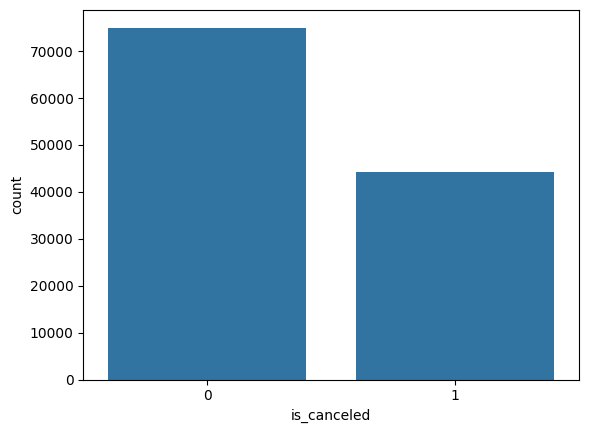

In [133]:
#Variable s—ñ la reserva fue cancelada o no
sns.countplot(data=df, x = 'is_canceled')
plt.show()

‚û°Ô∏è Es evidente que hay m√°s datos de una que de la otra, pudiera aplicarse una t√©cnicas de submuestreo para balancear las clases:



In [134]:
from sklearn.utils import resample

# Contar las clases:
count_class_No, count_class_Yes = df["is_canceled"].value_counts()

#Dividir los dataframes por las clases:
df_class_No = df[df["is_canceled"] == 0]
df_class_Yes = df[df["is_canceled"] == 1]

#submuestrear la clase mayoritaria No:
no_downsampled = resample(df_class_No,
                      replace=False, # muestra sin reemplazo
                      n_samples = count_class_Yes, # N√∫mero de muestras a generar

                      random_state = 27) # resultados reproducibles
                      #combinar dataframes
df_sample = pd.concat([df_class_Yes, no_downsampled])

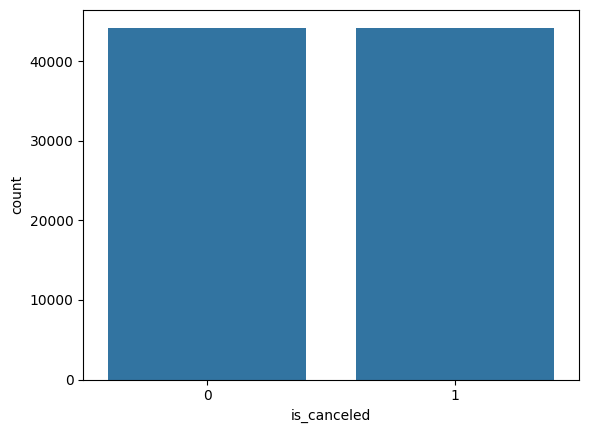

In [135]:
sns.countplot(data=df_sample, x = 'is_canceled')
plt.show()

**Consideraciones finales:**
Suponiendo existe un atributo del dataframe df.precio con un formato similar a este $1,560.50 y queremos corregir el dato a tipo float



In [136]:
import pandas as pd1

# Ejemplo de datos
data = {'precio': ['$1,560.50', '$2,340.75', '$980.25']}
df1 = pd1.DataFrame(data)
print("Antes de la conversi√≥n")
print(df1)

# Convertir a float
df1['precio'] = df1['precio'].str.replace('[\$,]', '', regex=True).astype(float)
print("Despu√©s de la conversi√≥n")
print(df1)

Antes de la conversi√≥n
      precio
0  $1,560.50
1  $2,340.75
2    $980.25
Despu√©s de la conversi√≥n
    precio
0  1560.50
1  2340.75
2   980.25


In [137]:
# =====================================
# MODELO DE REGRESI√ìN: Predicci√≥n del ADR
# =====================================

# !pip install sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecci√≥n de variables predictoras y target
X = df.drop(columns=['adr', 'reservation_status', 'reservation_status_date'])
y = df['adr']
# X contiene todas las columnas potencialmente √∫tiles menos aquellas que podr√≠an sesgar el modelo
# o contienen el target.

# Codificaci√≥n de variables categ√≥ricas
X = pd.get_dummies(X, drop_first=True) # Convierte variables categ√≥ricas (tipo texto o categor√≠as) en variables num√©ricas mediante One-Hot Encoding.
# drop_first=True: elimina una de las categor√≠as para evitar multicolinealidad (referencia redundante).
# Es buena pr√°ctica para regresi√≥n lineal.

# Divisi√≥n en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto imputador
imputer = SimpleImputer(strategy='mean') # o 'mediana', 'm√°s_frecuente'
# Crea un objeto que puede reemplazar los valores faltantes (NaN) en el dataset.
#strategy='mean': reemplazar√° los valores faltantes por la media de cada columna.

# Ajuste el imputador a los datos de entrenamiento y transforme tanto los datos de entrenamiento como los de prueba
X_train = imputer.fit_transform(X_train) # fit: calcula la media de cada columna en X_train.transform: reemplaza los valores faltantes en X_train con esa media.
X_test = imputer.transform(X_test) #Se reemplazan los NaN en X_test con las medias calculadas en X_train.
# Modelo de regresi√≥n lineal
reg_model = LinearRegression()
# En lugar de utilizar X_train.index, utilice el √≠ndice original de antes de la imputaci√≥n
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

# Evaluaci√≥n
print("MSE:", mean_squared_error(y_test, y_pred))
print("R¬≤:", r2_score(y_test, y_pred))

MSE: 884.3660677852059
R¬≤: 0.6173017982664337


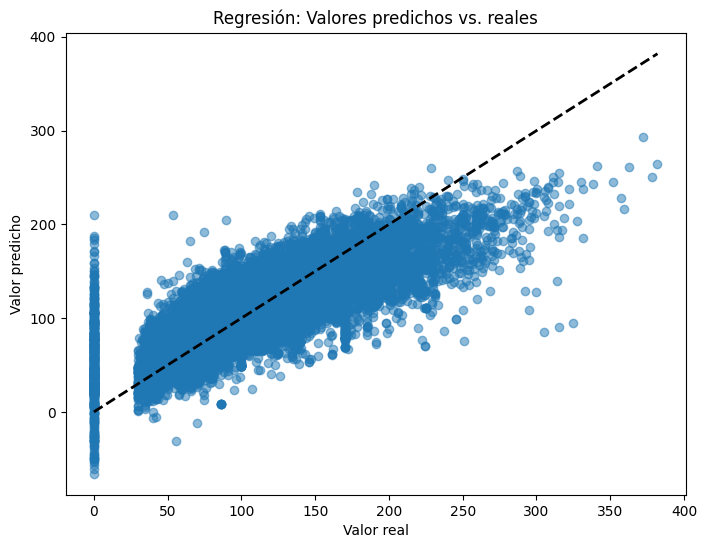

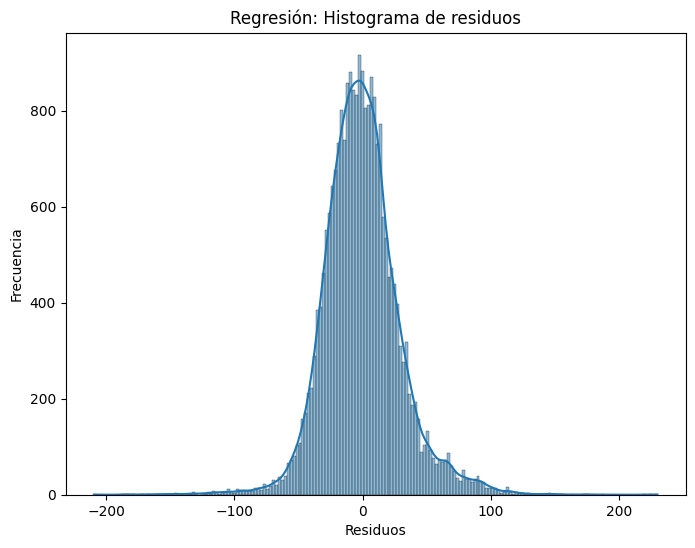

Regresi√≥n:
MSE: 884.3660677852059
R¬≤: 0.6173017982664337


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np

# =====================================
# Visualizaci√≥n de m√©tricas para el modelo de regresi√≥n
# =====================================

# Realizar predicciones usando el modelo de regresi√≥n
y_pred_reg = reg_model.predict(X_test) # Asignar a y_pred_reg

# Gr√°fico de dispersi√≥n de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # L√≠nea de referencia
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Regresi√≥n: Valores predichos vs. reales')
plt.show()

# Histograma de residuos
residuals = y_test - y_pred_reg
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True) # kde=True: agrega una curva de densidad suavizada (KDE = Kernel Density Estimation),
#que ayuda a ver la forma general de la distribuci√≥n.
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Regresi√≥n: Histograma de residuos')
plt.show()

# Imprimir m√©tricas
print("Regresi√≥n:")
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R¬≤:", r2_score(y_test, y_pred_reg))


Para el modelo de clasificaci√≥n binaria de cancelaci√≥n de reserva, se puede usar un algoritmo de regresi√≥n log√≠stica o sigmoide.

In [139]:
# =====================================
# MODELO DE CLASIFICACI√ìN BINARIA: Cancelaci√≥n de reserva
# =====================================
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Importar StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defina la variable objetivo correcta para la predicci√≥n de cancelaci√≥n
y = df['is_canceled'] # Cambiado de df['adr'] a df['is_canceled']

# Divisi√≥n en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Se llama a train_test_split con la variable de destino corregida.

# Imputaci√≥n de valores faltantes (NaN) usando SimpleImputer
imputer = SimpleImputer(strategy='mean')  # o 'mediana', 'm√°s_frecuente', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalar los datos usando StandardScaler despu√©s de la imputaci√≥n
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cree y ajuste el modelo de regresi√≥n log√≠stica con un valor m√°ximo de iteraci√≥n aumentado
clf_bin1 = LogisticRegression(random_state=42, max_iter=1000) # Incremente max_iter
clf_bin1.fit(X_train, y_train) # El modelo se ajusta utilizando la variable objetivo correcta.
# Generar predicciones utilizando el modelo de regresi√≥n log√≠stica ajustado
y_pred_logistic = clf_bin1.predict(X_test) # Asignar a una nueva variable

#Ahora use el y_pred correcto para la evaluaci√≥n
print("Accuracy:", accuracy_score(y_test, y_pred_logistic)) # Utilice y_pred_logistic
print(confusion_matrix(y_test, y_pred_logistic)) # Utilice y_pred_logistic
print(classification_report(y_test, y_pred_logistic)) # Utilice y_pred_logistic

Accuracy: 1.0
[[14958     0]
 [    0  8884]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14958
           1       1.00      1.00      1.00      8884

    accuracy                           1.00     23842
   macro avg       1.00      1.00      1.00     23842
weighted avg       1.00      1.00      1.00     23842



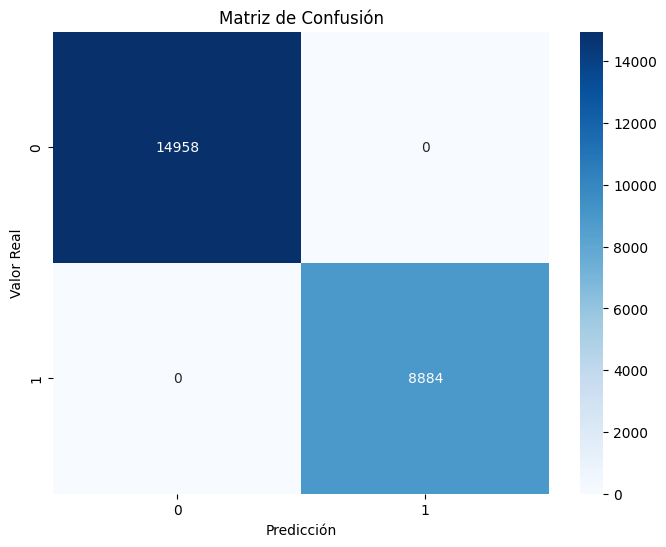

In [140]:
# Obtener la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_logistic)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusi√≥n")
plt.show()

**Construimos un modelo de arbol de decisi√≥n**

Accuracy: 0.851145038167939
[[13148  1810]
 [ 1739  7145]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     14958
           1       0.80      0.80      0.80      8884

    accuracy                           0.85     23842
   macro avg       0.84      0.84      0.84     23842
weighted avg       0.85      0.85      0.85     23842



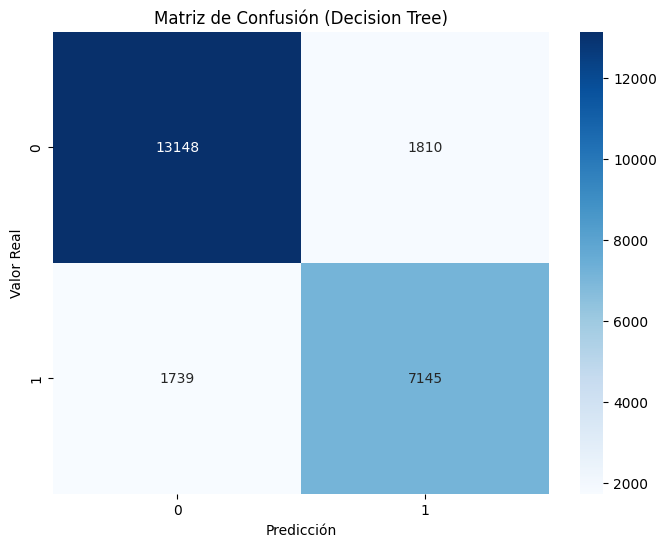

In [148]:
# =====================================
# MODELO DE CLASIFICACI√ìN BINARIA (Decision Tree): Cancelaci√≥n de reserva
# =====================================

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree # Import export_text and plot_tree
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Importar StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecci√≥n de variables predictoras y target
X = df.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date'])
# X contiene todas las columnas potencialmente √∫tiles menos aquellas que podr√≠an sesgar el modelo
# o contienen el target.
# Defina la variable objetivo correcta para la predicci√≥n de cancelaci√≥n
y = df['is_canceled']  # Cambiado de df['adr'] a df['is_canceled']

# Codificaci√≥n de variables categ√≥ricas
X = pd.get_dummies(X, drop_first=True) # Convierte variables categ√≥ricas (tipo texto o categor√≠as) en variables num√©ricas mediante One-Hot Encoding.
# drop_first=True: elimina una de las categor√≠as para evitar multicolinealidad (referencia redundante).

# Divisi√≥n en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Se llama a train_test_split con la variable de destino corregida.

# Imputaci√≥n de valores faltantes (NaN) usando SimpleImputer
imputer = SimpleImputer(strategy='mean')  # o 'mediana', 'm√°s_frecuente', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalar los datos usando StandardScaler despu√©s de la imputaci√≥n
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = clf_tree.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Visualizar la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusi√≥n (Decision Tree)")
plt.show()

**Reglas de texto**

Reglas del √°rbol de decisi√≥n:
 |--- deposit_type_Non Refund <= 1.15
|   |--- lead_time <= -0.87
|   |   |--- required_car_parking_spaces <= 1.81
|   |   |   |--- lead_time <= -0.90
|   |   |   |   |--- country_PRT <= 0.18
|   |   |   |   |   |--- market_segment_Online TA <= 0.05
|   |   |   |   |   |   |--- country_AGO <= 8.98
|   |   |   |   |   |   |   |--- previous_cancellations <= 1.70
|   |   |   |   |   |   |   |   |--- hotel_Resort Hotel <= 0.35
|   |   |   |   |   |   |   |   |   |--- country_RUS <= 6.66
|   |   |   |   |   |   |   |   |   |   |--- arrival_date_week_number <= 1.72
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- arrival_date_week_number >  1.72
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- country_RUS >  6.66
|   |   |   |   |   |   |   |   |   |   |--- market_segment_Corporate <= 2.21
|   |   |   |   |   |   |   | 

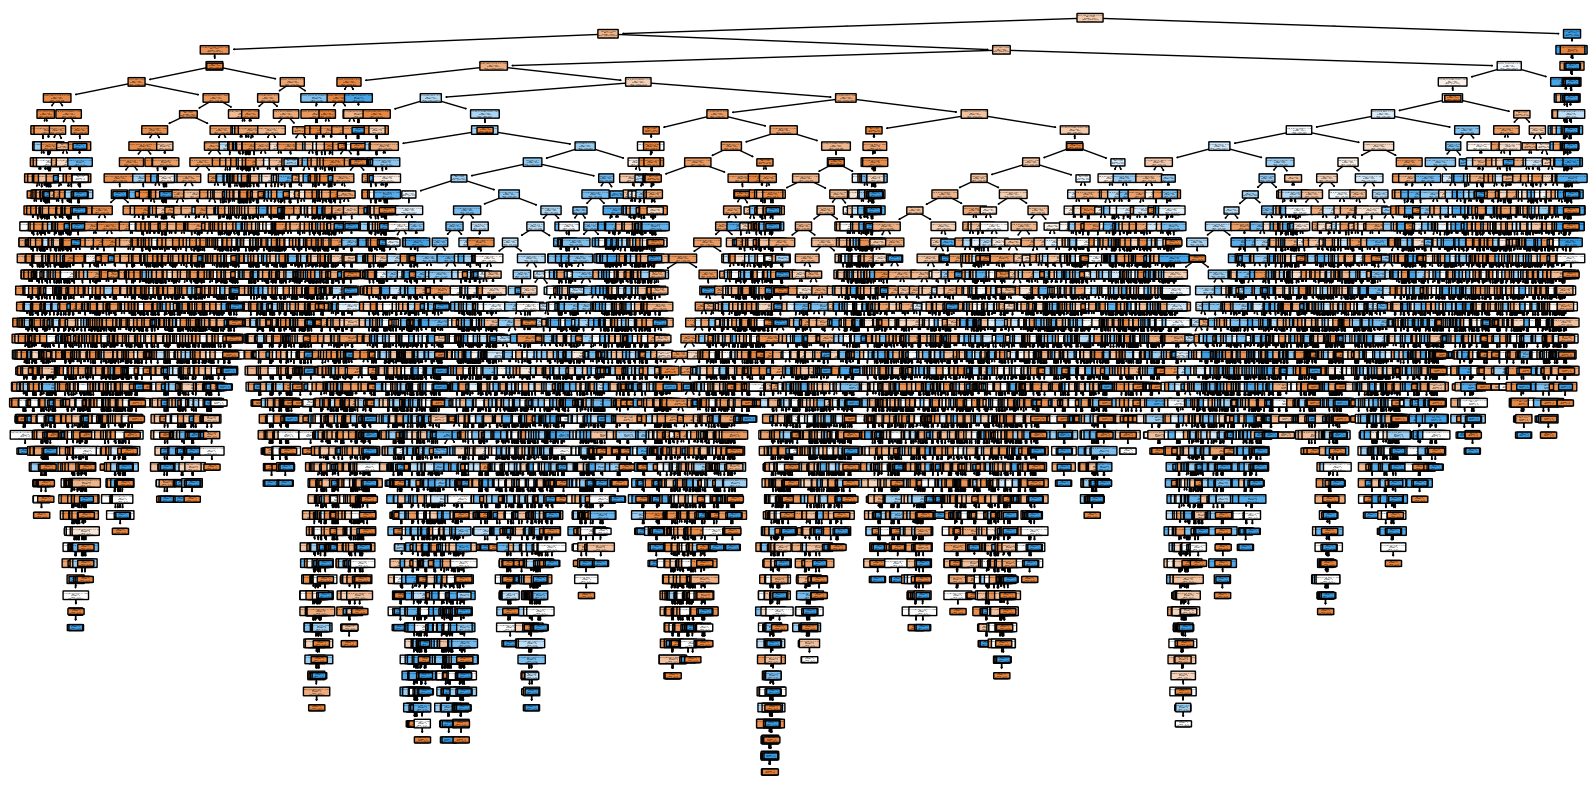

In [149]:
# Mostrar el √°rbol como reglas de texto
tree_rules = export_text(clf_tree, feature_names=list(X.columns))
print("Reglas del √°rbol de decisi√≥n:\n", tree_rules)

# Graficar el √°rbol de decisi√≥n
plt.figure(figsize=(20, 10))  # Ajustar el tama√±o de la figura seg√∫n sea necesario
plot_tree(clf_tree, feature_names=list(X.columns), filled=True, rounded=True, class_names=['No Cancelado', 'Cancelado'])
plt.show()

**Modelo random forest**

Accuracy: 0.8901937756899589
[[14143   815]
 [ 1803  7081]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     14958
           1       0.90      0.80      0.84      8884

    accuracy                           0.89     23842
   macro avg       0.89      0.87      0.88     23842
weighted avg       0.89      0.89      0.89     23842



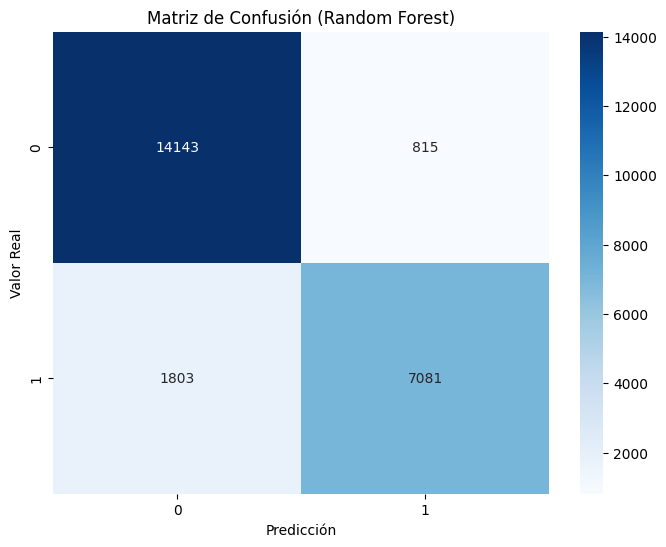

In [150]:
# =====================================
# MODELO DE CLASIFICACI√ìN BINARIA (Random Forest): Cancelaci√≥n de reserva
# =====================================

from sklearn.ensemble import RandomForestClassifier  # Importar RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Importar StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defina la variable objetivo correcta para la predicci√≥n de cancelaci√≥n
y = df['is_canceled']  # Cambiado de df['adr'] a df['is_canceled']

# Selecci√≥n de variables predictoras y target
X = df.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date'])
# X contiene todas las columnas potencialmente √∫tiles menos aquellas que podr√≠an sesgar el modelo
# o contienen el target.

# Codificaci√≥n de variables categ√≥ricas
X = pd.get_dummies(X, drop_first=True) # Convierte variables categ√≥ricas (tipo texto o categor√≠as) en variables num√©ricas mediante One-Hot Encoding.
# drop_first=True: elimina una de las categor√≠as para evitar multicolinealidad (referencia redundante).

# Divisi√≥n en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Se llama a train_test_split con la variable de destino corregida.

# Imputaci√≥n de valores faltantes (NaN) usando SimpleImputer
imputer = SimpleImputer(strategy='mean')  # o 'mediana', 'm√°s_frecuente', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalar los datos usando StandardScaler despu√©s de la imputaci√≥n
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = clf_rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Visualizar la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusi√≥n (Random Forest)")
plt.show()

**Clasificaci√≥n multiclase**

In [151]:
# =====================================
# MODELO DE CLASIFICACI√ìN MULTICLASE: Predicci√≥n del pa√≠s
# =====================================

# Import the necessary class
from sklearn.ensemble import RandomForestClassifier

# Eliminamos pa√≠ses con pocos registros para mayor estabilidad
top_countries = df['country'].value_counts().nlargest(5).index
df_multi = df[df['country'].isin(top_countries)]

X = df_multi.drop(columns=['country', 'reservation_status', 'reservation_status_date'])
y = df_multi['country']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_multi = RandomForestClassifier(random_state=42)
clf_multi.fit(X_train, y_train)
y_pred = clf_multi.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7563838314439483
              precision    recall  f1-score   support

         DEU       0.67      0.50      0.57      1509
         ESP       0.62      0.46      0.53      1644
         FRA       0.57      0.59      0.58      2097
         GBR       0.68      0.62      0.65      2421
         PRT       0.84      0.92      0.87      9795

    accuracy                           0.76     17466
   macro avg       0.67      0.62      0.64     17466
weighted avg       0.75      0.76      0.75     17466

